<font color='blue'> Привет. Вижу, ты хорошо проработал проект, молодец. Ниже мои комментарии выделены синим. </font>

## <a name="0.0"></a>Содержание:
* [0. Описание проекта, описание данных, импорт библиотек](#0.)
* [1. (Шаг 1) Ознакомление с данными и их обработка:](#1.)
     - [1.1. Смотрим общую информацию и чистим данные:](#1.1.)
       + [1.1.1. Датафрейм users](#1.1.1.)
       + [1.1.2. Функция для изменения формата столбца на datetime и добавления столбцов "год", "месяц", "время года"](#1.1.2.)
       + [1.1.3. Датафрейм calls](#1.1.3.)
       + [1.1.4. Датафрейм messages](#1.1.4.)
       + [1.1.5. Датафрейм internet](#1.1.5.)
       + [1.1.6. Датафрейм tariffs](#1.1.6.)
     - [1.2. Изменение типа данных столбцов с датами и добавление столбцов "год", "месяц" и "время года" по каждому датафрейму](#1.2.)
     - [1.3. Самые популярные города клиентов](#1.3.)
     - [1.4. Добавление координат к датафрейму users](#1.4.)
     - [1.5. Визуализация географии пользователей](#1.5.)     
     - [1.6. Информация по количеству событий по месяцам](#1.6.)
* [2. (Шаг 2) Расчёт помесячной выручки с каждого пользователя:](#2.)
     - [2.1. Формирование необходимых данных по датафреймом и их склеивание в один датафрейм df_event_numbers](#2.1.)
     - [2.2. Добавление столбцов с тарифом, широтой и долготой](#2.2.)
     - [2.3. Заполнение пропусков в новом датафрейме](#2.3.)     
     - [2.4. Сравнение количества пользователей и частоты использования тарифов](#2.4.)
     - [2.5. Добавление информации о помесячной выручке с каждого пользователя:](#2.5.)
       + [2.5.1. Новый столбец "Аб. плата"](#2.5.1.)
       + [2.5.2. Новые столбцы Минуты сверх", "СМС сверх", "Мб сверх", "Плата сверх лимита](#2.5.2.)
       + [2.5.3. Новый столбец "Сумма за месяц"](#2.5.3.)   
       + [2.5.4. Анализ данных по переплатам (заказам доп. пакетов услуг)](#2.5.4.)
     - [2.6. Сравнение по тарифам, какие услуги чаще дозаказывают](#2.6.)
     - [2.7. Сравнение годовой выручки по каждому из тарифов](#2.7.)
     - [2.8. Сводная таблица по полученным о тарифах данным](#2.8.)
* [3. (Шаг 3) Описание поведения клиента на основе полученной выборки](#3.)  
     - [3.1. Получаем информацию о выбросах по каждому из набора данных (построение boxplot)](#3.1.)
       + [3.1.1. Boxplot с whis = [2,98]](#3.1.1.)
       + [3.1.2. Boxplot с whis = 1,5](#3.1.2.)
       + [3.1.3. Определение лимитов для фильтрации данных](#3.1.3.)
     - [3.2. Гистограммы по тарифам по длительности звонков, количеству отправленных смс и количеству потраченного интернет-трафика](#3.2.)
       + [3.2.1. Гистограмма длительности звонков](#3.2.1.)
       + [3.2.2. Гистограмма отправленных СМС](#3.2.2.)
       + [3.2.3. Гистограмма использованного интернет-трафика](#3.2.3.)
* [4. (Шаг 4) Проверка гипотез:](#4.)
     - [4.1. Первая гипотеза: о различии в средней выручке по тарифам](#4.1.)
       + [4.1.1. Формирование выборок без аномалий](#4.1.1.)
       + [4.1.2. Расчет p-value](#4.1.2.)
       + [4.1.3. Итог](#4.1.3.)     
     - [4.2. Вторая гипотеза: о различии в средней выручке между Москвой и другими регионами](#4.2.)
       + [4.2.1. Формирование выборок без аномалий](#4.2.1.)
       + [4.2.2. Расчет p-value](#4.2.2.)
       + [4.2.3. Итог](#4.2.3.)
* [5. (Шаг 5) Общий вывод](#5.)
     - [5.1. Общие данные по тарифам по части использования включенных в абонентскую плату лимитов и по части дозаказываемых (пакетов) услуг](#5.1.)
     - [5.2. Информация по переплатам](#5.2.)
     - [5.3. Вывод](#5.3.) 

## <b>Описание проекта</b><a name="0."></a>
<font size="2">([к содержанию](#0.0))</font><br/>
Вы аналитик компании <b>«Мегалайн»</b> — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: <font color=#0F74F1><b>Смарт</b></font> и <font color=#20B605><b>Ультра</b></font>. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей <b>«Мегалайна»</b>: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<font size="4"><b>Описание тарифов</b></font><br/><br/>
<b>Тариф <font color=#0F74F1><b>Смарт</b></font></b>:
* 1. Ежемесячная плата: 550 рублей
* 2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* 3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

<b>Тариф <font color=#20B605><b>Ультра</b></font></b>:
* 1. Ежемесячная плата: 1950 рублей
* 2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* 3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
<br/>


<font size="2">  
Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
</font>

<font size="4"><b>Описание данных</b></font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

Таблица <font size="3"><b>users</b></font> (информация о пользователях):
* <b>user_id</b> — уникальный идентификатор пользователя
* <b>first_name</b> — имя пользователя
* <b>last_name</b> — фамилия пользователя
* <b>age</b> — возраст пользователя (годы)
* <b>reg_date</b> — дата подключения тарифа (день, месяц, год)
* <b>churn_date</b> — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* <b>city</b> — город проживания пользователя
* <b>tariff</b> — название тарифного плана

Таблица <font size="3"><b>calls</b></font> (информация о звонках):
* <b>id</b> — уникальный номер звонка
* <b>call_date</b> — дата звонка
* <b>duration</b> — длительность звонка в минутах
* <b>user_id</b> — идентификатор пользователя, сделавшего звонок

Таблица <font size="3"><b>messages</b></font> (информация о сообщениях):
* <b>id</b> — уникальный номер сообщения
* <b>message_date</b> — дата сообщения
* <b>user_id</b> — идентификатор пользователя, отправившего сообщение

Таблица <font size="3"><b>internet</b></font> (информация об интернет-сессиях):
* <b>id</b> — уникальный номер сессии
* <b>mb_used</b> — объём потраченного за сессию интернет-трафика (в мегабайтах)
* <b>session_date</b> — дата интернет-сессии
* <b>user_id</b> — идентификатор пользователя

Таблица <font size="3"><b>tariffs</b></font> (информация о тарифах):
* <b>tariff_name</b> — название тарифа
* <b>rub_monthly_fee</b> — ежемесячная абонентская плата в рублях
* <b>minutes_included</b> — количество минут разговора в месяц, включённых в абонентскую плату
* <b>messages_included</b> — количество сообщений в месяц, включённых в абонентскую плату
* <b>mb_per_month_included</b> — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* <b>rub_per_minute</b> — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* <b>rub_per_message</b> — стоимость отправки сообщения сверх тарифного пакета
* <b>rub_per_gb</b> — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<hr style="border: 1px solid #000;"> 

## Шаг 1. Ознакомление с данными и их обработка:<a name="1."></a>
<font size="2">([к содержанию](#0.0))</font><br/>

Загружаем данные:

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

<b>1.1. Смотрим общую информацию и чистим данные.</b><a name="1.1."></a><br/>
<a name="1.1.1."></a><br/>
<b>1.1.1. Начинаем с users</b>:<br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Проверим, все ли пользователи уникальные:

In [4]:
print("Число строк в датафрейме users:", users.shape[0])
print("Число уникальных пользователей:", users['user_id'].count())
print("Число дубликатов:", users.duplicated().sum())

Число строк в датафрейме users: 500
Число уникальных пользователей: 500
Число дубликатов: 0


Все пользователи уникальные, дубликатов нет.

Посмотрим на пропуски:

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропуски только в столбце <b>churn_date</b>, причем их довольно много. Смотрим описание задачи - там сказано:<br/>
"<b>churn_date</b> - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)".<br/>
Вот и хорошо, оставим данные в этом столбце как есть - для решения поставленной задачи они нам не нужны.<br/><br/>

Необходимо изменить тип данных:
* <b>reg_date</b> - на datetime.<br/>

Необходимо добавить следующие столбцы:
* <b>месяц</b>;
* <b>время года</b>.

Напишем под это функцию, сами замены/добавления произведем позже.<br/>
<a name="1.1.2."></a><br/><b>1.1.2. Функция для изменения формата столбца на datetime и добавление столбцов "месяц" и "время года":</b><br/>
<font size="2">([к содержанию](#0.0))</font>

In [6]:
# функция определения времени года
def get_season(date):
    if date.month in [1, 2, 12]:
        return 'зима'
    elif date.month in [3, 4, 5]:
        return 'весна'
    elif date.month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

    
# столбец в формат datetime + добавление столбцов "месяц" и "время года"
def date_to_dt_month_season(dataframes):
    for df in dataframes:
        for column in df.columns:
            if 'date' in column and column != 'churn_date':
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                df['месяц'] = df[column].apply(lambda x: x.month)
                df['время года'] = df[column].apply(get_season)

<a name="1.1.3."></a><br/>
<b>1.1.3. Посмотрим таблицу calls</b>:
<br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [7]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


202607 строк данных. Данные полные, без пропусков. <br/><br/>
Необходимо изменить тип данных:
* <b>call_date</b> - на datetime.

Посмотрим на гистограмму распределения длительности звонков:

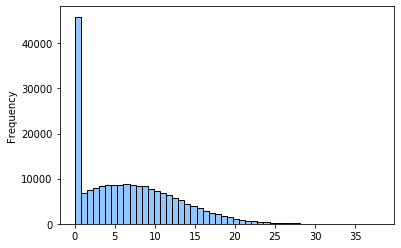

In [9]:
plt.style.use('seaborn-pastel')
calls['duration'].plot(kind='hist', ec='black', bins=50)

Можем быть, все звонки длительностью до 1 минуты, имеют длительность "0"? Проверяем:

In [10]:
calls.query('0 < duration < 0.5')

,id,call_date,duration,user_id
55,1000_55,2018-09-19,0.31,1000
65,1000_65,2018-10-28,0.34,1000
97,1000_97,2018-10-26,0.33,1000
122,1000_122,2018-10-07,0.13,1000
135,1000_135,2018-10-25,0.02,1000
...,...,...,...,...
202318,1498_111,2018-10-17,0.46,1498
202322,1498_115,2018-10-02,0.49,1498
202438,1499_51,2018-10-08,0.47,1499
202452,1499_65,2018-11-30,0.20,1499


Нет, всё не так. Есть звонки и околонулевой длительности.

Ещё раз взглянем на задание: <b>«Мегалайн»</b> всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.<br/>
Округляем в большую сторону до минуты все звонки при помощи np.ceil:

In [11]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Повторно посмотрим на гистограмму распределения длительности звонков:

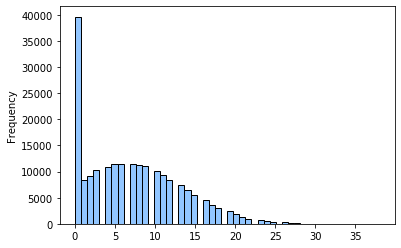

In [12]:
calls['duration'].plot(kind='hist', ec='black', bins=50)

Посмотрим на "нулевые" звонки:

In [13]:
calls.query('duration == 0.0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


Их аж 40000. Проверим, к одному ли тарифу они относятся. Может быть, на каком-то тарифе так некорректно округлились данные, которые должны были округлиться в большую сторону (до 1 минуты):

In [14]:
map_to_fill_tariff = dict(pd.Series(users['tariff'].values, index=users['user_id']))
calls['Тариф'] = calls['user_id'].map(map_to_fill_tariff)
calls['Тариф'].value_counts()

smart    130315
ultra     72292
Name: Тариф, dtype: int64

Не подтвердилась гипотеза - по каждому из тарифов есть нулевые звонки. Предполагаю, что это несостоявшиеся звонки. Нулевая их длительность вызвана прерыванием связи или случаями, когда у другого абонента было "занято" и поэтому происходил моментальный сброс вызова после дозвона. Т.к. они не расходуют лимиты минут и вообще не принимают участия в формировании конечной выручки, удаляем эти строки:

In [15]:
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()

Проверяем:

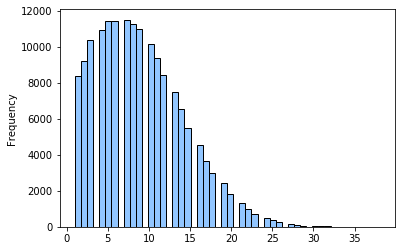

In [16]:
calls['duration'].plot(kind='hist', ec='black', bins=50)

<a name="1.1.4."></a><br/>
<b>1.1.4. Посмотрим таблицу messages</b>:
<br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [17]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [18]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


123036 строк данных. Данные полные, без пропусков. <br/><br/>
Необходимо изменить тип данных:
* <b>message_date</b> - на datetime.

<a name="1.1.5."></a><br/>
<b>1.1.5. Посмотрим таблицу internet</b>:
<br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [19]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


149396 строк данных. Данные полные, без пропусков. <br/><br/>
Необходимо изменить тип данных:
* <b>session_date</b> - на datetime.

Ещё раз взглянем на задание: <b>«Мегалайн»</b> всегда округляет вверх значения минут и мегабайт. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.<br/>
Округляем в большую сторону до мегабайта весь трафик по каждой сессии при помощи np.ceil:

In [21]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1053.0,2018-09-07,1000
2,1000_2,1198.0,2018-06-25,1000
3,1000_3,551.0,2018-08-22,1000
4,1000_4,303.0,2018-09-24,1000


Посмотрим на гистограмму распределения использования интернет-трафика в сессиях:

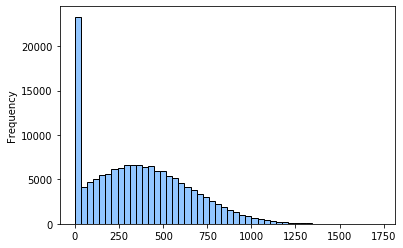

In [22]:
internet['mb_used'].plot(kind='hist', ec='black', bins=50)

Посмотрим на строки с нулевым трафиком:

In [23]:
internet.query('mb_used == 0')

,id,mb_used,session_date,user_id
11,1000_11,0.0,2018-08-28,1000
38,1000_38,0.0,2018-11-27,1000
46,1000_46,0.0,2018-06-30,1000
67,1000_67,0.0,2018-06-16,1000
72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499
149381,1499_142,0.0,2018-11-01,1499
149383,1499_144,0.0,2018-11-27,1499
149386,1499_147,0.0,2018-10-21,1499


Таких строк аж 20000. Это сессии, когда подключение к интернету было включено, но в дальнейшем ни одной операции произведено не было (например, случаи, когда появляется и сразу пропадает связь).<br/>
Эти строки необходимо исключить из датафрейма:

In [24]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

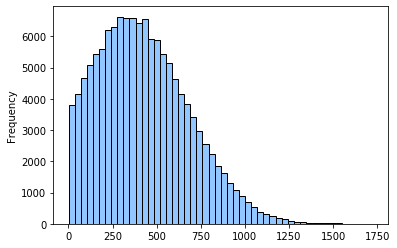

In [25]:
internet['mb_used'].plot(kind='hist', ec='black', bins=50)

<a name="1.1.6."></a><br/>
<b>1.1.6. Посмотрим таблицу tariffs</b>:
<br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [26]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<font color='blue'> Эта часть выполнена отлично. </font>

Данные по тарифам. Это как справочная таблица.

<a name="1.2."></a><br/>
<b>1.2. Изменение типа данных столбцов с датами и добавление столбцов "год", "месяц" и "время года" по каждому датафрейму</b><br/>
<font size="2">([к содержанию](#0.0))</font><br/><br/>Итак, по каждой из таблиц (<b>users, calls, messages, internet</b>) есть столбцы, где необходимо изменить тип данных на <b>"datetime"</b>. Помимо этого, добавим столбцы <b>"год", "месяц"</b> и <b>"время года"</b>.<br/>
Запустим ранее написанную функцию, передав ей в качестве параметра список из этих датафреймов:

In [27]:
date_to_dt_month_season([users, calls, messages, internet])

Проверим, что получилось:

In [28]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,месяц,время года
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,весна
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,осень
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,лето
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8,лето
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,весна


In [29]:
calls.head()

,id,call_date,duration,user_id,Тариф,месяц,время года
2,1000_2,2018-06-11,3.0,1000,ultra,6,лето
3,1000_3,2018-09-21,14.0,1000,ultra,9,осень
4,1000_4,2018-12-15,6.0,1000,ultra,12,зима
7,1000_7,2018-08-22,19.0,1000,ultra,8,лето
8,1000_8,2018-09-15,19.0,1000,ultra,9,осень


In [30]:
messages.head()

,id,message_date,user_id,месяц,время года
0,1000_0,2018-06-27,1000,6,лето
1,1000_1,2018-10-08,1000,10,осень
2,1000_2,2018-08-04,1000,8,лето
3,1000_3,2018-06-16,1000,6,лето
4,1000_4,2018-12-05,1000,12,зима


In [31]:
internet.head()

,id,mb_used,session_date,user_id,месяц,время года
0,1000_0,113.0,2018-11-25,1000,11,осень
1,1000_1,1053.0,2018-09-07,1000,9,осень
2,1000_2,1198.0,2018-06-25,1000,6,лето
3,1000_3,551.0,2018-08-22,1000,8,лето
4,1000_4,303.0,2018-09-24,1000,9,осень


Всё хорошо:  даты стали датами. Теперь посмотрим информацию ближе.

<font color='blue'> Здесь все верно. </font>

<a name="1.3."></a><br/>
<b>1.3. Самые популярные города клиентов.</b><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

Посмотрим, какие города представлены в этом датафрейме и в каком процентном соотношении:

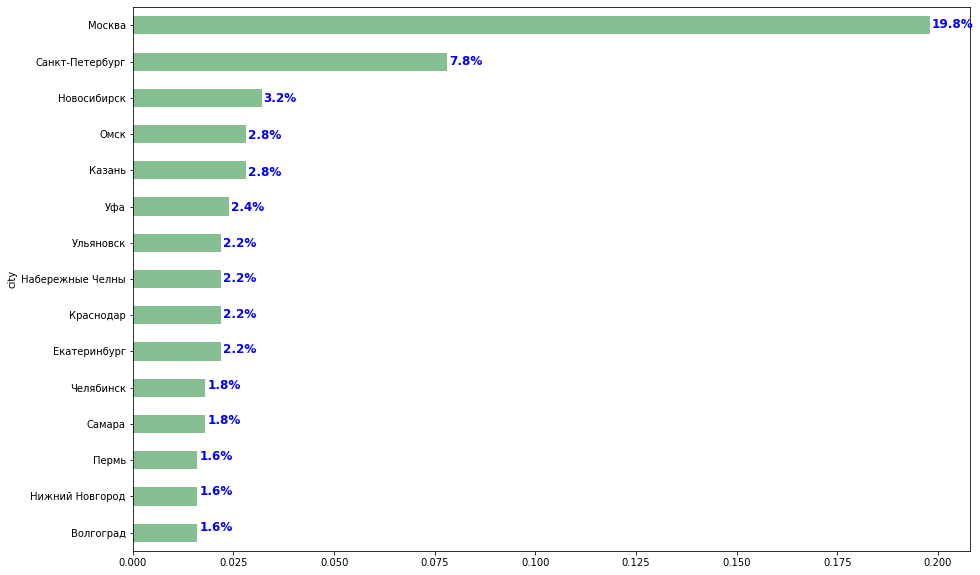

In [32]:
all_users = len(users)
df_for_barh = users.groupby('city').size()/all_users
df_for_barh_filtered = df_for_barh[df_for_barh > 0.015].sort_values()
ax = df_for_barh_filtered.plot(kind='barh', color='#86bf91', figsize=(15,10))

labels = dict(df_for_barh_filtered)
labels

i = 0
for city in labels:
    ax.text(labels[city] + 0.0005, i + 0.05, str(round(labels[city]*100, 2)) + '%', 
            fontsize = 'large', fontweight='bold', color='blue')
    if i < 9.7:
        i += 0.98
    else:
        i += 1.02

Ожидаемо, больше всего клиентов в этом датафрейме из <b>Москвы</b> - почти 20%. <br/>
7,8% - из <b>Питера</b>. <br/>Представителей остальных городов от ~ 3% и меньше.

<font color='blue'> Хорошо, все наглядно. </font>

<a name="1.4."></a><br/>
<b>1.4. Добавление координат к датафрейму users.</b><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

Для составления географической карты присутствия наших клиентов добавим к каждой строке этого датафрейма географические координаты по каждому городу из датафрейма.

Воспользуемся <b>Yandex.Геокодер</b>'ом.<br/>
Формируем список уникальных городов:

In [33]:
list_of_cities = users['city'].unique().tolist()

Запускаем функцию, которая вернет нам список coordinates, содержащий информацию о координатах по каждому городу:

In [34]:
# время исполнения функции ~ 30 сек

import requests as r
url = 'https://geocode-maps.yandex.ru/1.x/?format=json&apikey=85355801-b54d-40db-9534-019c83397623&geocode='
coordinates = []

for city in list_of_cities:
    if city == city: # чтоб не столкнуться с nan
        url_formatted = url + city
        response = r.get(url_formatted).json()
        data = response['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point'].get('pos')
        coordinate = (float(data.split()[1]), float(data.split()[0]))
        coordinates.append(coordinate)
    else:
        coordinates.append('')

Формируем датафрейм, чтобы посмотреть, что у нас получилось:

In [35]:
unique_cities_coordinates = pd.DataFrame({'Город':list_of_cities, 'Координаты':coordinates})
unique_cities_coordinates.head(10)

,Город,Координаты
0,Краснодар,"(45.03547, 38.975313)"
1,Москва,"(55.753215, 37.622504)"
2,Стерлитамак,"(53.630403, 55.930825)"
3,Новокузнецк,"(53.757547, 87.136044)"
4,Набережные Челны,"(55.740776, 52.406384)"
5,Ульяновск,"(54.314192, 48.403123)"
6,Челябинск,"(55.159897, 61.402554)"
7,Пермь,"(58.01045, 56.229434)"
8,Тюмень,"(57.153033, 65.534328)"
9,Самара,"(53.195538, 50.101783)"


Проставим координаты в отдельном столбце датафрейма <b>users</b>:

Формируем словарь, чтобы потом добавить столбец <b>'coordinates'</b> в основной датафрейм <b>users</b>:

In [36]:
dict_unique_cities_coordinates = dict(pd.Series(unique_cities_coordinates['Координаты'].values,
                                index=unique_cities_coordinates['Город'].values))

In [37]:
users['coordinates'] = users['city'].map(dict_unique_cities_coordinates)

Разнесем долготу и широту в разные столбцы и удалим начальный столбец с координатами:

In [38]:
users['Latitude'] = users['coordinates'].apply(lambda x: x[0])
users['Longitude'] = users['coordinates'].apply(lambda x: x[1])
users = users.drop(['coordinates'], axis=1)

Смотрим, что получилось:

In [39]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,месяц,время года,Latitude,Longitude
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,весна,45.035470,38.975313
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11,осень,55.753215,37.622504
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,лето,53.630403,55.930825
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8,лето,55.753215,37.622504
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,весна,53.757547,87.136044
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,1,зима,55.740776,52.406384
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2,зима,54.314192,48.403123
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart,4,весна,55.753215,37.622504
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,12,зима,55.159897,61.402554
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart,3,весна,58.010450,56.229434


Всё ок.

Посмотрим теперь географию наших пользователей на карте.

<a name="1.5."></a><br/>
<b>1.5. Визуализация географии пользователей</b><br/>
<font size="2">([к содержанию](#0.0))</font><br/>

Для визуализации воспользуемся <b>Folium</b>'ом.<br/><br/>
Установим его:

In [40]:
!pip install folium

Создадим отдельный датафрейм, на основе которого будет рисовать карту:

In [41]:
users_folium = users[['Latitude', 'Longitude']].copy()

<b>Folium</b> при прорисовке <b>HeatMap</b> имеет баг, когда он не учитывает вес (количество повторений в датафрейме) каждой точки. В итоге получается так, что, например, 100 точек в Москве и 10 точек в Ростове имеют одинаковую интенсивность.<br/>
Поэтому обойдем это через добавление к каждой точке координат (к широте и к долготе) небольшого числа (нескольких сотых), чтобы каждая точка прорисовывалась отдельно, но в рамках необходимого города.<br/>
Некоторые точки могут оказаться "в воде", но это будет видно только при приближении, на общем плане всё будет в рамках территории/области города.<br/><br/>
Создадим функции для этого:

In [42]:
import random

def new_lat(row):
    rand_number = random.uniform(-1,1)/5
    return row['Latitude'] + rand_number

def new_long(row):
    rand_number = random.uniform(-1,1)/5
    return row['Longitude'] + rand_number

Создадим столбцы с "новыми" (более разнообразными) данными по широте и долготе. Добавим ещё столбец <b>'count'</b>, чтобы образовать единичные веса для построения <b>HeatMap</b>:

In [43]:
users_folium['New_Lat'] = users_folium.apply(new_lat, axis=1)
users_folium['New_Long'] = users_folium.apply(new_long, axis=1)
users_folium['count'] = 1

Импортируем <b>Folium</b> и рисуем карту:

In [44]:
import folium
from folium.plugins import HeatMap

base_map = folium.Map(location=[56.838011, 60.597465], control_scale=False, zoom_start=3)

data = users_folium[['New_Lat', 'New_Long', 'count']].groupby(['New_Lat', 'New_Long']).sum().reset_index().values.tolist()
HeatMap(data=data, radius=10, max_zoom=5, gradient={.4: 'blue', .8: 'lime', 1.0: 'red'},
        blur=10, max_val=15).add_to(base_map)

base_map

Большая часть представленных городов находится в Западной части страны (преимущественно, в южной её части).<br/>
Самые "яркие" представители - Москва и Санкт-Петербург. Другие города немного более "тусклые", но тем не менее довольно много городов имеют не единичных представителей.

<font color='blue'> Да, все классно. </font>

<a name="1.6."></a><br/><b>1.6.</b> Посмотрим на то, <b>каким типом связи (звонок, отправка СМС, выход в интернет) пользуются чаще всего (по месяцам):</b>
<br/>
<font size="2">([к содержанию](#0.0))</font><br/>

Для этого напишем функцию:

In [45]:
def barplot_by_month(dfs, query=None):
    list_of_dfs = dfs
    plt.figure(figsize=(15,5))
    ax = plt.gca()
    
    list_of_colors = ['forestgreen', 'grey', 'mediumaquamarine']

    dfs_names_for_legend = ['Кол-во звонков', 'Кол-во отпр. СМС', 'Кол-во интернет-сессий']
    legend_list = []

    for i in range(len(list_of_dfs)):
        curr_df = list_of_dfs[i]
        if query == None:
            curr_df_prepared = curr_df.groupby('месяц')['id'].count().reset_index()
        else:
            curr_df_prepared = curr_df.query(query).groupby('месяц')['id'].count().reset_index()
        plot = curr_df_prepared.plot(x='месяц', y='id', kind='bar', ec='black', color=list_of_colors[i],
                                 ax=ax, width=0.1, position=i)
        legend_list.append(dfs_names_for_legend[i])
    plt.xticks(rotation=0)
    ax.legend(legend_list)

Нарисуем график:

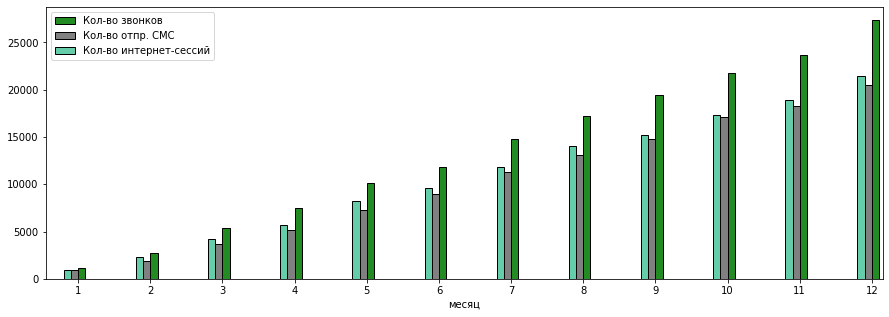

In [46]:
barplot_by_month([calls, messages, internet])

Тенденция везде одинакова: чаще всего звонят, реже всего отправляют СМС.<br/>
Выглядит странно - будто бы мы наблюдаем процесс "становления" тарифа оператора мобильной связи. В январе был его запуск, а в декабре - итог развития за год.

Посмотрим историю одного пользователя - например, с <b>id "1000"</b>:

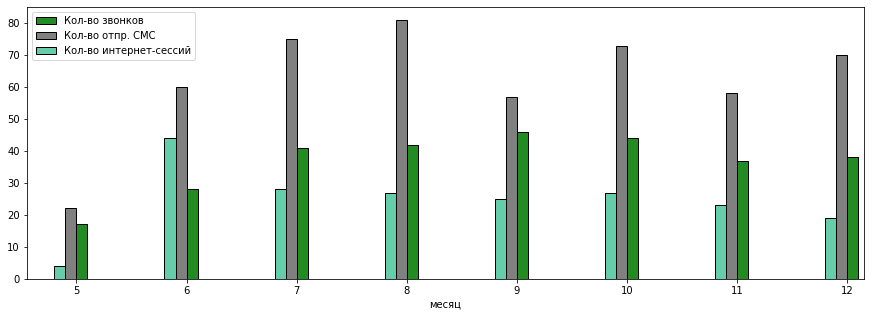

In [47]:
barplot_by_month([calls, messages, internet], query='user_id == 1000')

Всё в порядке. Данные вариативны.<br/>
Вполне возможно, что и правда были запущены 2 новых тарифа и мы собираем данные за первый год их "работы".

<hr style="border: 1px solid #000;"> 

<a name="2."></a>
## Шаг 2. Расчёт помесячной выручки с каждого пользователя:
<font size="2">([к содержанию](#0.0))</font><br/>
Посчитаем для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

<a name="2.1."></a><br/>
<b>2.1. </b>Для начала возьмем из каждого имеющегося датафрейма нужную информацию и склеим эти данные в один датафрейм <b>df_event_numbers</b>:<br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [48]:
num_of_calls = calls.groupby(['user_id', 'время года', 'месяц'])['duration'].agg(['count', 'sum'])
num_of_messages = messages.groupby(['user_id', 'время года', 'месяц'])['id'].count()
num_of_internet = internet.groupby(['user_id', 'время года', 'месяц']).sum()['mb_used']

In [49]:
df_event_numbers = pd.concat([num_of_calls, num_of_messages, num_of_internet], axis=1)
df_event_numbers = df_event_numbers.reset_index()
df_event_numbers.head()

,user_id,время года,месяц,count,sum,id,mb_used
0,1000,весна,5,17.0,159.0,22.0,2256.0
1,1000,зима,12,38.0,333.0,70.0,9827.0
2,1000,лето,6,28.0,172.0,60.0,23257.0
3,1000,лето,7,41.0,340.0,75.0,14016.0
4,1000,лето,8,42.0,408.0,81.0,14070.0


<font color='blue'> Хорошо, ресурсы рассчитаны верно. </font>

<a name="2.2."></a><br/>
<b>2.2. Добавим столбцы с тарифом, городом, широтой и долготой</b>:
<br/>
<font size="2">([к содержанию](#0.0))</font><br/>

In [50]:
map_to_fill_tariff = dict(pd.Series(users['tariff'].values, index=users['user_id']))
df_event_numbers['Тариф'] = df_event_numbers['user_id'].map(map_to_fill_tariff)

map_to_fill_city = dict(pd.Series(users['city'].values, index=users['user_id']))
df_event_numbers['Город'] = df_event_numbers['user_id'].map(map_to_fill_city)

map_to_fill_Latitude = dict(pd.Series(users['Latitude'].values, index=users['user_id']))
df_event_numbers['Latitude'] = df_event_numbers['user_id'].map(map_to_fill_Latitude)

map_to_fill_Longitude = dict(pd.Series(users['Longitude'].values, index=users['user_id']))
df_event_numbers['Longitude'] = df_event_numbers['user_id'].map(map_to_fill_Longitude)

Переименуем столбцы:

In [51]:
df_event_numbers.columns = ['User_id', 'Время года', 'Месяц', 'Кол-во звонков, шт.', 'Звонки, мин.', 
                            'СМС, шт.', 'Интернет, Мб', 'Тариф', 'Город', 'Широта', 'Долгота']

Смотрим на итог:

In [52]:
df_event_numbers.sort_values(by=['User_id', 'Месяц']).head(10)

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,Широта,Долгота
0,1000,весна,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,45.035470,38.975313
2,1000,лето,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,45.035470,38.975313
3,1000,лето,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,45.035470,38.975313
4,1000,лето,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,45.035470,38.975313
5,1000,осень,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,45.035470,38.975313
6,1000,осень,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,45.035470,38.975313
7,1000,осень,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,45.035470,38.975313
1,1000,зима,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,45.035470,38.975313
9,1001,осень,11,45.0,430.0,NaN,18452.0,smart,Москва,55.753215,37.622504
8,1001,зима,12,47.0,414.0,NaN,14053.0,smart,Москва,55.753215,37.622504


In [53]:
df_event_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 11 columns):
User_id                3214 non-null int64
Время года             3214 non-null object
Месяц                  3214 non-null int64
Кол-во звонков, шт.    3168 non-null float64
Звонки, мин.           3168 non-null float64
СМС, шт.               2717 non-null float64
Интернет, Мб           3201 non-null float64
Тариф                  3214 non-null object
Город                  3214 non-null object
Широта                 3214 non-null float64
Долгота                3214 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 276.3+ KB


In [54]:
df_event_numbers[df_event_numbers['Интернет, Мб'].isnull()]

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,Широта,Долгота
592,1094,весна,5,12.0,107.0,3.0,NaN,ultra,Новосибирск,55.030199,82.920430
1722,1273,весна,5,19.0,220.0,21.0,NaN,ultra,Курган,55.441004,65.341118
1723,1273,зима,12,38.0,260.0,39.0,NaN,ultra,Курган,55.441004,65.341118
1724,1273,лето,6,28.0,230.0,38.0,NaN,ultra,Курган,55.441004,65.341118
1725,1273,лето,7,30.0,253.0,37.0,NaN,ultra,Курган,55.441004,65.341118
1726,1273,лето,8,39.0,253.0,41.0,NaN,ultra,Курган,55.441004,65.341118
1727,1273,осень,9,28.0,223.0,32.0,NaN,ultra,Курган,55.441004,65.341118
1728,1273,осень,10,35.0,315.0,35.0,NaN,ultra,Курган,55.441004,65.341118
1729,1273,осень,11,31.0,272.0,29.0,NaN,ultra,Курган,55.441004,65.341118
2307,1365,осень,10,5.0,43.0,1.0,NaN,smart,Ростов-на-Дону,47.222078,39.720349


<a name="2.3."></a><br/>
<b>2.3. Заполнение пропусков</b>:
<br/>
<font size="2">([к содержанию](#0.0))</font><br/>

Пропуски есть по каждому из столбцов. Вероятно, некоторые из пользователей за рассматриваемый период времени или ни разу не звонили, или ни разу не отправляли СМС, или ни разу не выходили в интернет. Посмотрим, нет ли у нас пользователей, которые ни разу не звонили, не отправляли смс и не заходили в интернет:<br/><br/>

In [55]:
df_event_numbers[(df_event_numbers['Интернет, Мб'].isnull()) & (df_event_numbers['СМС, шт.'].isnull()) &
                 (df_event_numbers['Звонки, мин.'].isnull())]

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,Широта,Долгота


Таких нет, это значит, что каждый из пользователей активный, просто в какие-то периоды мог не пользоваться одним из типов связи.<br/><br/>
Поэтому проставим по имеющимся пропускам нули, которые будут означать, что в конкретном месяце данный клиент не звонил/не отправлял СМС/не пользовался интернетом:

In [56]:
df_event_numbers = df_event_numbers.fillna(0)

In [57]:
df_event_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 11 columns):
User_id                3214 non-null int64
Время года             3214 non-null object
Месяц                  3214 non-null int64
Кол-во звонков, шт.    3214 non-null float64
Звонки, мин.           3214 non-null float64
СМС, шт.               3214 non-null float64
Интернет, Мб           3214 non-null float64
Тариф                  3214 non-null object
Город                  3214 non-null object
Широта                 3214 non-null float64
Долгота                3214 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 276.3+ KB


<a name="2.4."></a><br/>
<b>2.4. Сравнение количества пользователей и частоты использования тарифов и видов связи</b>:
<br/>
<font size="2">([к содержанию](#0.0))</font><br/>

Посмотрим на то, какая часть клиентов использует тариф <font color=#0F74F1><b>Смарт</b></font>, а какая - <font color=#20B605><b>Ультра</b></font>:

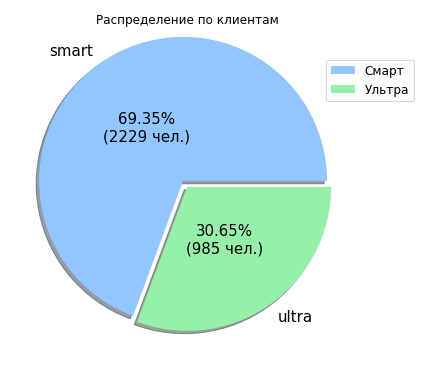

In [58]:
all_users = df_event_numbers['User_id'].count()


def func_pct(pct):
    value = float(pct/100.*all_users)
    return "{:.2f}%\n({:.0f} чел.)".format(pct, value)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df_event_numbers.groupby('Тариф')['User_id'].count().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Распределение по клиентам', pctdistance=0.45,
                                                                     figsize=(20,5), autopct=lambda pct: func_pct(pct))

plt.tight_layout(pad=0)

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), prop={'size':12})
    ax.set_ylabel('')

<font size="3.5"><b>70% клиентов пользуются тарифом <font color=#0F74F1><b>Смарт</b></font>.</b></font>

Посмотрим на частоту использования (проговоренные минуты, отправленные СМС и используемый интернет-трафик) по каждому из тарифов:

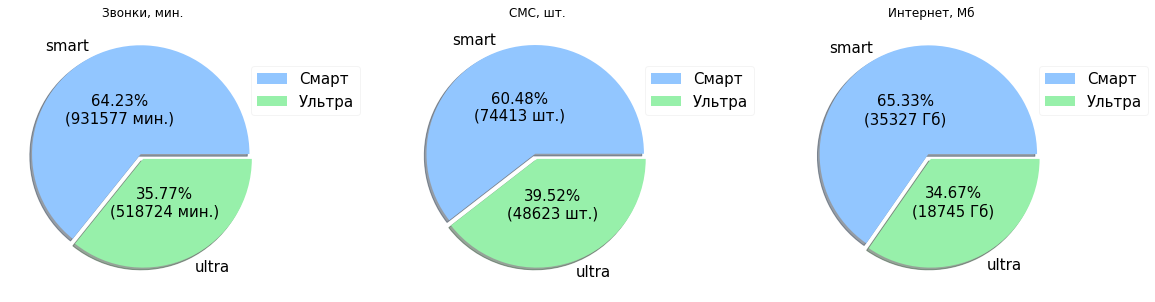

In [59]:
columns_to_plot = ['Звонки, мин.', 'СМС, шт.', 'Интернет, Мб']

calls_sum = df_event_numbers['Звонки, мин.'].sum()
sms_sum = df_event_numbers['СМС, шт.'].sum()
internet_sum = df_event_numbers['Интернет, Мб'].sum()

def func_pct(pct):
    if pct > 65 or pct < 35:
        sum_of_data = internet_sum
        value = float(pct/100.*sum_of_data/1024)
        metric = 'Гб'
    elif pct > 64 or pct < 36:
        sum_of_data = calls_sum
        value = float(pct/100.*sum_of_data)
        metric = 'мин.'
    else:
        sum_of_data = sms_sum
        value = float(pct/100.*sum_of_data)
        metric = 'шт.'
    return "{:.2f}%\n({:.0f} {})".format(pct, value, metric)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df_event_numbers.groupby('Тариф')[columns_to_plot].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                       use_index=False, shadow=True, explode=explode,
                                                                       title = columns_to_plot, pctdistance=0.45,
                                                                       autopct=lambda pct: func_pct(pct), figsize=(20,5))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], framealpha=0.2, bbox_to_anchor=(0.87,0.87), prop={'size':15})
    ax.set_ylabel('')

<font size="3.5"><b>Около 60% всех минут разговоров, отправленных СМС и использованных мегабайт произведено пользователями, использующими тариф <font color=#0F74F1><b>Смарт</b></font>.</b></font>

Вернемся к заданию.

<a name="2.5."></a><br/>
<b>2.5. Добавление информации о помесячной выручке с каждого пользователя</b>:
<br/>
<font size="2">([к содержанию](#0.0))</font>

Разобьем на 3 группы столбцов:
* <b>"Аб. плата"</b>;
* <b>"Минуты сверх", "СМС сверх", "Мб сверх", "Плата сверх лимита"</b>;
* <b>"Сумма за месяц"</b>.

<a name="2.5.1."></a><br/>
<b>2.5.1.</b> Для создания столбца <b>"Аб. плата"</b> создадим словарь и на его базе добавим новые данные:<br/>
<font size="2">([к содержанию](#0.0))</font>

In [60]:
month_price = {'smart': 550, 'ultra': 1950}
df_event_numbers['Аб. плата, руб.'] = df_event_numbers['Тариф'].map(month_price)

<a name="2.5.2."></a><br/>
<b>2.5.2.</b> Для создания столбцов <b>"Минуты сверх", "СМС сверх", "Мб сверх", "Плата сверх лимита"</b> напишем функцию, которая будет считать превышения в зависимости от тарифа:<br/>
<font size="2">([к содержанию](#0.0))</font>

In [61]:
df_event_numbers.head()

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,Широта,Долгота,"Аб. плата, руб."
0,1000,весна,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,45.03547,38.975313,1950
1,1000,зима,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,45.03547,38.975313,1950
2,1000,лето,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,45.03547,38.975313,1950
3,1000,лето,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,45.03547,38.975313,1950
4,1000,лето,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,45.03547,38.975313,1950


In [62]:
def calls_over_plan(row):
    if row['Тариф'] == 'smart':
        result = row['Звонки, мин.'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['Звонки, мин.'] - 3000
        return np.where(result > 0, result, 0)
    
    
def sms_over_plan(row):
    if row['Тариф'] == 'smart':
        result = row['СМС, шт.'] - 50
        return np.where(result > 0, result, 0)
    else:
        result =  row['СМС, шт.'] - 1000
        return np.where(result > 0, result, 0)
    

def internet_over_plan(row):
    if row['Тариф'] == 'smart':
        result = row['Интернет, Мб'] - 15 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['Интернет, Мб'] - 30 * 1024
        return np.where(result > 0, result, 0)
    
    
def month_revenue(row):
    sum_per_month = 0
    if row['Тариф'] == 'smart':
        sum_per_month += np.ceil(row['Минуты сверх']) * 3
        sum_per_month += row['СМС сверх'] * 3
        sum_per_month += np.ceil(row['Мб сверх']/1024) * 200
        return sum_per_month
    
    else:
        sum_per_month += np.ceil(row['Минуты сверх']) * 1
        sum_per_month += row['СМС сверх'] * 1
        sum_per_month += np.ceil(row['Мб сверх']/1024) * 150
        return sum_per_month

Создадим новые столбцы:

In [63]:
df_event_numbers['Минуты сверх'] = df_event_numbers.apply(calls_over_plan, axis=1)
df_event_numbers['СМС сверх'] = df_event_numbers.apply(sms_over_plan, axis=1)
df_event_numbers['Мб сверх'] = df_event_numbers.apply(internet_over_plan, axis=1)

df_event_numbers['Плата сверх лимита, руб.'] = df_event_numbers.apply(month_revenue, axis=1)

for column in ['Минуты сверх', 'Мб сверх']:
    df_event_numbers[column] = df_event_numbers[column].astype('float')

for column in ['СМС сверх', 'Плата сверх лимита, руб.']:
    df_event_numbers[column] = df_event_numbers[column].astype('int')

In [64]:
df_event_numbers.head(10)

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,Широта,Долгота,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб."
0,1000,весна,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0
1,1000,зима,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0
2,1000,лето,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0
3,1000,лето,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0
4,1000,лето,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0
5,1000,осень,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0
6,1000,осень,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0
7,1000,осень,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0
8,1001,зима,12,47.0,414.0,0.0,14053.0,smart,Москва,55.753215,37.622504,550,0.0,0,0.0,0
9,1001,осень,11,45.0,430.0,0.0,18452.0,smart,Москва,55.753215,37.622504,550,0.0,0,3092.0,800


<a name="2.5.3."></a><br/>
<b>2.5.3.</b> Для создания столбца <b>"Сумма за месяц"</b> построчно просуммируем данные по 2 только что созданным столбцам: <b>"Аб. плата"</b> и <b>"Плата сверх лимита"</b>:<br/>
<font size="2">([к содержанию](#0.0))</font>

In [65]:
df_event_numbers['Сумма за месяц, руб.'] = df_event_numbers['Аб. плата, руб.'] + df_event_numbers['Плата сверх лимита, руб.']

Смотрим на результат:

In [66]:
df_event_numbers.head(10)

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,Широта,Долгота,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб.","Сумма за месяц, руб."
0,1000,весна,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0,1950
1,1000,зима,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0,1950
2,1000,лето,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0,1950
3,1000,лето,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0,1950
4,1000,лето,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0,1950
5,1000,осень,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0,1950
6,1000,осень,10,44.0,350.0,73.0,14717.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0,1950
7,1000,осень,11,37.0,338.0,58.0,14768.0,ultra,Краснодар,45.035470,38.975313,1950,0.0,0,0.0,0,1950
8,1001,зима,12,47.0,414.0,0.0,14053.0,smart,Москва,55.753215,37.622504,550,0.0,0,0.0,0,550
9,1001,осень,11,45.0,430.0,0.0,18452.0,smart,Москва,55.753215,37.622504,550,0.0,0,3092.0,800,1350


Посмотрим, есть ли вообще клиенты, которые превышали лимиты:

In [67]:
df_event_numbers[df_event_numbers['Сумма за месяц, руб.'] > 1950]

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,Широта,Долгота,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб.","Сумма за месяц, руб."
68,1009,лето,7,20.0,183.0,14.0,24752.0,smart,Пермь,58.010450,56.229434,550,0.0,0,9392.0,2000,2550
69,1009,лето,8,27.0,249.0,9.0,23738.0,smart,Пермь,58.010450,56.229434,550,0.0,0,8378.0,1800,2350
81,1011,зима,12,44.0,361.0,6.0,22900.0,smart,Самара,53.195538,50.101783,550,0.0,0,7540.0,1600,2150
84,1011,лето,8,58.0,515.0,15.0,21526.0,smart,Самара,53.195538,50.101783,550,15.0,0,6166.0,1445,1995
87,1011,осень,11,52.0,501.0,12.0,25332.0,smart,Самара,53.195538,50.101783,550,1.0,0,9972.0,2003,2553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,1496,лето,8,62.0,527.0,41.0,23560.0,smart,Вологда,59.220496,39.891523,550,27.0,0,8200.0,1881,2431
3200,1496,осень,9,58.0,486.0,29.0,26970.0,smart,Вологда,59.220496,39.891523,550,0.0,0,11610.0,2400,2950
3201,1496,осень,10,56.0,450.0,35.0,28215.0,smart,Вологда,59.220496,39.891523,550,0.0,0,12855.0,2600,3150
3202,1496,осень,11,66.0,662.0,46.0,25092.0,smart,Вологда,59.220496,39.891523,550,162.0,0,9732.0,2486,3036


Такие есть. Посмотрим, какая часть клиентов "вылезает" за рамки ежемесячных лимитов по каждому из тарифов.<br/>

<font color='blue'> Хорошо, выручка рассчитана верно. </font>

<a name="2.5.4."></a><br/>
<b>2.5.4.</b> Анализ данных по переплатам (заказам доп. пакетов услуг).<br/><br/>
Для удобства создадим колонку <b>'Не хватило тарифного плана'</b> с признаком: "0" - клиент не превышал месячные лимиты тарифа, "1" - превышал.<br/>
<font size="2">([к содержанию](#0.0))</font>

In [68]:
df_event_numbers['Не хватило тарифного плана'] = np.where(df_event_numbers['Плата сверх лимита, руб.'] > 0, 1, 0)

Нарисуем круговую диаграмму по каждому из тарифов, чтобы увидеть, какая часть пользователей "дозаказывает" услуги после истечения месячных лимитов по тарифу:

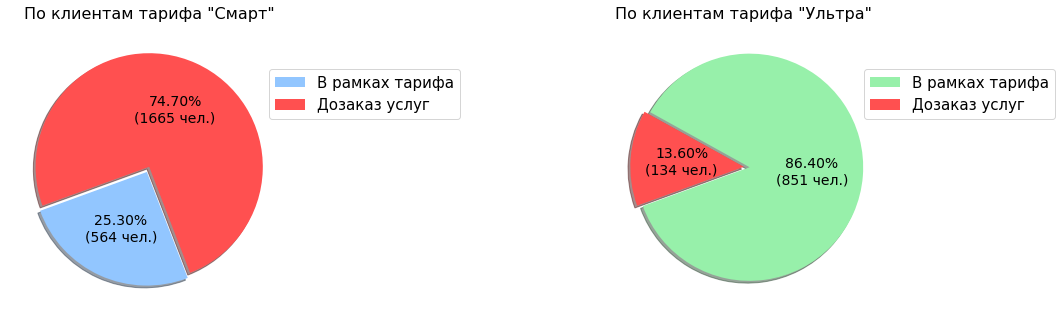

In [69]:
filter_list = ['smart', 'ultra']
titles_list = ['По клиентам тарифа "Смарт"', 'По клиентам тарифа "Ультра"']
rows = 1
cols = 2
filter_list_counter = 0

sum_smart = df_event_numbers[df_event_numbers['Тариф'] == 'smart'].count()['User_id']
sum_ultra = df_event_numbers[df_event_numbers['Тариф'] == 'ultra'].count()['User_id']

annot_labels = ['В рамках тарифа', 'Дозаказ услуг']

def func_pct(pct):
    if pct < 75 and pct > 25:
        value = float(pct/100.*sum_smart)
    else:
        value = float(pct/100.*sum_ultra)
    return "{:.2f}%\n({:.0f} чел.)".format(pct, value)

fig, axes = plt.subplots(rows, cols, figsize=(20,10))

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

for r in range(rows):
    for c in range(cols):
        if filter_list[filter_list_counter] == 'smart':
            colors = ['#92c6ff', '#ff5050']
        else:
            colors = ['#97F0AA', '#ff5050']
        curr_filtered_df = df_event_numbers[df_event_numbers['Тариф'] == filter_list[filter_list_counter]].groupby('Не хватило тарифного плана')['User_id']
        ax = curr_filtered_df.count().plot(kind='pie', fontsize=14, use_index=False, shadow=True, explode=explode,
                                           title=titles_list[filter_list_counter], pctdistance=0.55, figsize=(20,5),
                                           autopct=lambda pct: func_pct(pct), startangle=200, ax=axes[c], colors=colors,
                                           labels=None)

        filter_list_counter += 1

plt.tight_layout(pad=3)

for ax in axes:
    ax.legend(['В рамках тарифа', 'Дозаказ услуг'], bbox_to_anchor=(0.897,0.87), prop={'size':15})
    ax.set_ylabel('')
    ax.title.set_size(16)
    ax.title.set_position([0.5, 1.15])

Видим, что по тарифу <font color=#0F74F1><b>Смарт</b></font> примерно в 75% случаев клиенту не хватает заложенных в абонентскую плату минут, СМС или гигабайт, и он "дозаказывает" эти услуги.<br/>
И наоборот, почти всем клиентам с тарифом <font color=#20B605><b>Ультра</b></font> всегда всего хватает, кроме 13% - они тоже "дозаказывают" услуги вне поверх абонентской платы.

Посмотрим на гистограмму "переплат" клиентов тарифа <font color=#0F74F1><b>Смарт</b></font>:

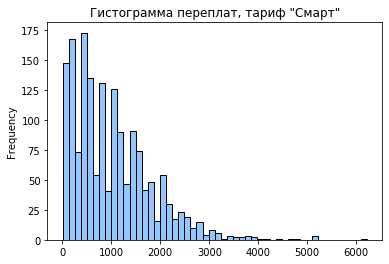

In [70]:
title = 'Гистограмма переплат, тариф "Смарт"'
df_filtered = df_event_numbers[(df_event_numbers['Тариф'] == 'smart') & 
                               (df_event_numbers['Плата сверх лимита, руб.'] > 0)]['Плата сверх лимита, руб.']
df_filtered.plot(kind='hist', title=title, ec='black', bins=50)

Большинство переплачивает до 1200 рублей. Это довольно много, учитывая, что размер абонентский платы - 550 рублей.<br/>
Посмотрим ближе:

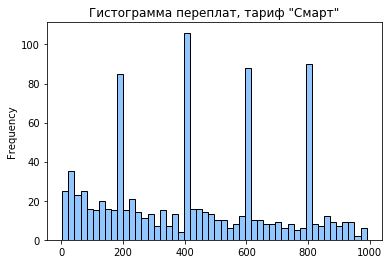

In [71]:
title = 'Гистограмма переплат, тариф "Смарт"'
df_filtered_less1000 = df_event_numbers[(df_event_numbers['Тариф'] == 'smart') & 
                                        (df_event_numbers['Плата сверх лимита, руб.'] > 0) &
                                        (df_event_numbers['Плата сверх лимита, руб.'] < 1000)]['Плата сверх лимита, руб.']
df_filtered_less1000.plot(kind='hist', title=title, ec='black', bins=50)

Большая часть клиентов если переплачивает, то переплачивает сумму, кратную 200 рублям. То есть дозаказывают разное количество раз 1 Гб интернета за 200 рублей.

Посмотрим на гистограмму "переплат" клиентов тарифа <font color=#20B605><b>Ультра</b></font>:

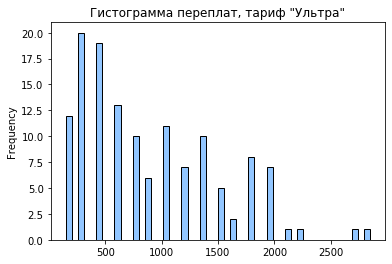

In [72]:
title = 'Гистограмма переплат, тариф "Ультра"'
df_filtered = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra') & 
                               (df_event_numbers['Плата сверх лимита, руб.'] > 0)]['Плата сверх лимита, руб.']
df_filtered.plot(kind='hist', title=title, ec='black', bins=50)

В основном, переплаты до 1500 рублей. Посмотрим поближе:

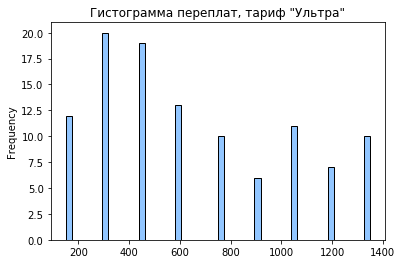

In [73]:
title = 'Гистограмма переплат, тариф "Ультра"'
df_filtered_less1000 = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra') & 
                                        (df_event_numbers['Плата сверх лимита, руб.'] > 0) &
                                        (df_event_numbers['Плата сверх лимита, руб.'] < 1500)]['Плата сверх лимита, руб.']
df_filtered_less1000.plot(kind='hist', title=title, ec='black', bins=50)

Переплачивают по 150р. за дополнительный 1 Гб интернет-трафика различное количество раз.

<a name="2.6."></a><br/>
<b>2.6. Какие услуги чаще дозаказывают пользователи каждого из тарифов</b>:
<br/>
<font size="2">([к содержанию](#0.0))</font>

In [74]:
(df_event_numbers.groupby('Тариф').sum()[['Минуты сверх', 'СМС сверх', 'Мб сверх']]).reset_index()

,Тариф,Минуты сверх,СМС сверх,Мб сверх
0,smart,92739.0,12928,6175667.0
1,ultra,0.0,0,743233.0


Пользователи тарифа <font color=#0F74F1><b>Смарт</b></font> доказывают услуги каждого типа связи. Пользователи тарифа <font color=#20B605><b>Ультра</b></font> - только интернет.

<a name="2.7."></a><br/>
<b>2.7. Сравнение суммарную выручку за год по каждому из тарифов</b>:
<br/>
<font size="2">([к содержанию](#0.0))</font>

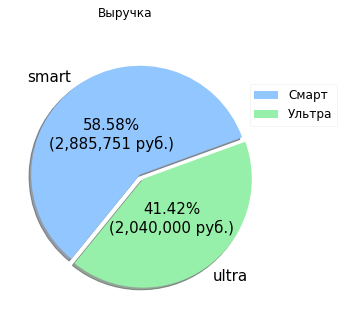

In [75]:
all_revenue = df_event_numbers['Сумма за месяц, руб.'].sum()


def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df_event_numbers.groupby('Тариф')['Сумма за месяц, руб.'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Выручка', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')

<font size="4"><b>59% выручки приносят клиенты, пользующиеся тарифом <font color=#0F74F1><b>Смарт</b></font>.</b></font><br/>
Взяли количеством.

<a name="2.8."></a><br/>
<b>2.8. Сводная таблица по полученным о тарифах данным</b>:
<br/>
<font size="2">([к содержанию](#0.0))</font>
<html>
<body>
<table border="1" cellspacing="0" cellpadding="0">
<tr>
<td> &nbsp; </td>
<td colspan=2 style="text-align:center;"><b>Кол-во абонентов</b></td>
<td colspan=2 style="text-align:center;"><b>Звонки</b></td>
<td colspan=2 style="text-align:center;"><b>СМС</b></td>
<td colspan=2 style="text-align:center;"><b>Интернет</b></td>
<td colspan=2 style="text-align:center;"><b>Выручка</b></td>    
</tr>
<tr>
<td style="background-color:#92c6ff; font-size: 12px;"> <b>Тариф "Смарт" </b></td>
<td style="color:#16B4DC; font-size: 15px;" ><b>69,3 % </b></td>
<td>2229 чел.</td>
<td style="color:#16B4DC; font-size: 15px;" ><b>64,2 % </b></td>
<td>931 577 мин</td>
<td style="color:#16B4DC; font-size: 15px;" ><b>60,5 % </b></td>
<td>74413 шт.</td>
<td style="color:#16B4DC; font-size: 15px;" ><b>65,3 % </b></td>
<td>35 327 Гб</td>
<td style="color:#16B4DC; font-size: 15px;" ><b>58,6 % </b></td>
<td>2,89 млн руб.</td>
</tr>
<tr>
    <td style="background-color:#97F0AA; font-size: 12px;"> <b>Тариф "Ультра"</b></td>
<td>30,7 %</td>
<td>985 чел. </td>
<td>35,8 %  </td>
<td>518 724 мин</td>
<td>39,5 %  </td>
<td>48623 шт.</td>
<td>34,7 %  </td>
<td>18 745 Гб</td>
<td>41,4 % </td>
<td>2,04 млн руб.</td>
</tr>
</table>
</body>
</html>

Больше людей пользуются тарифом <font color=#0F74F1><b>Смарт</b></font>, больше трафика проходит через тариф <font color=#0F74F1><b>Смарт</b></font>, больше отправляется смс и больше совершается звонков, и, как следствие, большую часть выручки приносит тариф <font color=#0F74F1><b>Смарт</b></font>, даже несмотря на что, что абонентская плата по тарифу <font color=#20B605><b>Ультра</b></font> в 3 раза выше.

<font color='blue'> Очень качественный и наглядный анализ. </font>

<hr style="border: 1px solid #000;"> 

<a name="3."></a>
## Шаг 3. Описание поведения клиента на основе полученной выборки
<font size="2">([к содержанию](#0.0))</font>

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

<a name="3.1."></a><br/>
<b>3.1. Получаем информацию о выбросах по каждому из набора данных.</b><br/><br/>Сначала построим <b>boxplot'</b>ы по всем рассматриваемым данным (длительность звонка, количество отправленных СМС, объем использованного интернет-трафика), чтобы зафиксировать выбросы и отфильтровать их при дальнейшем анализе. Сначала зададим нижнее и верхнее значения усов через 2 и 98 квантили и построим один boxplot, потом построим boxplot со стандартным межквартильным размахом, равным 1,5:<br/>
<font size="2">([к содержанию](#0.0))</font>

Напишем под это функцию:

In [76]:
def plot_box(whis):
    column_list = ['Звонки, мин.', 'СМС, шт.', 'Интернет, Мб']
    rows = 1
    cols = 3
    column_list_counter = 0

    fig, axes = plt.subplots(rows, cols, figsize=(40,15))

    for r in range(rows):
        for c in range(cols):
            ax = df_event_numbers.boxplot(column=column_list[column_list_counter], by='Тариф', fontsize=40, ax=axes[c],
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, whis=whis)
            ax.set_title(column_list[column_list_counter])
            ax.title.set_size(40)
            ax.set_xlabel('')
            plt.suptitle('Boxplot с whis = {}'.format(whis), y=1, fontsize=45, fontweight='bold')
            column_list_counter += 1

<a name="3.1.1."></a><br/>
<b>3.1.1. whis = [2,98]:</b><br/>
<font size="2">([к содержанию](#0.0))</font>

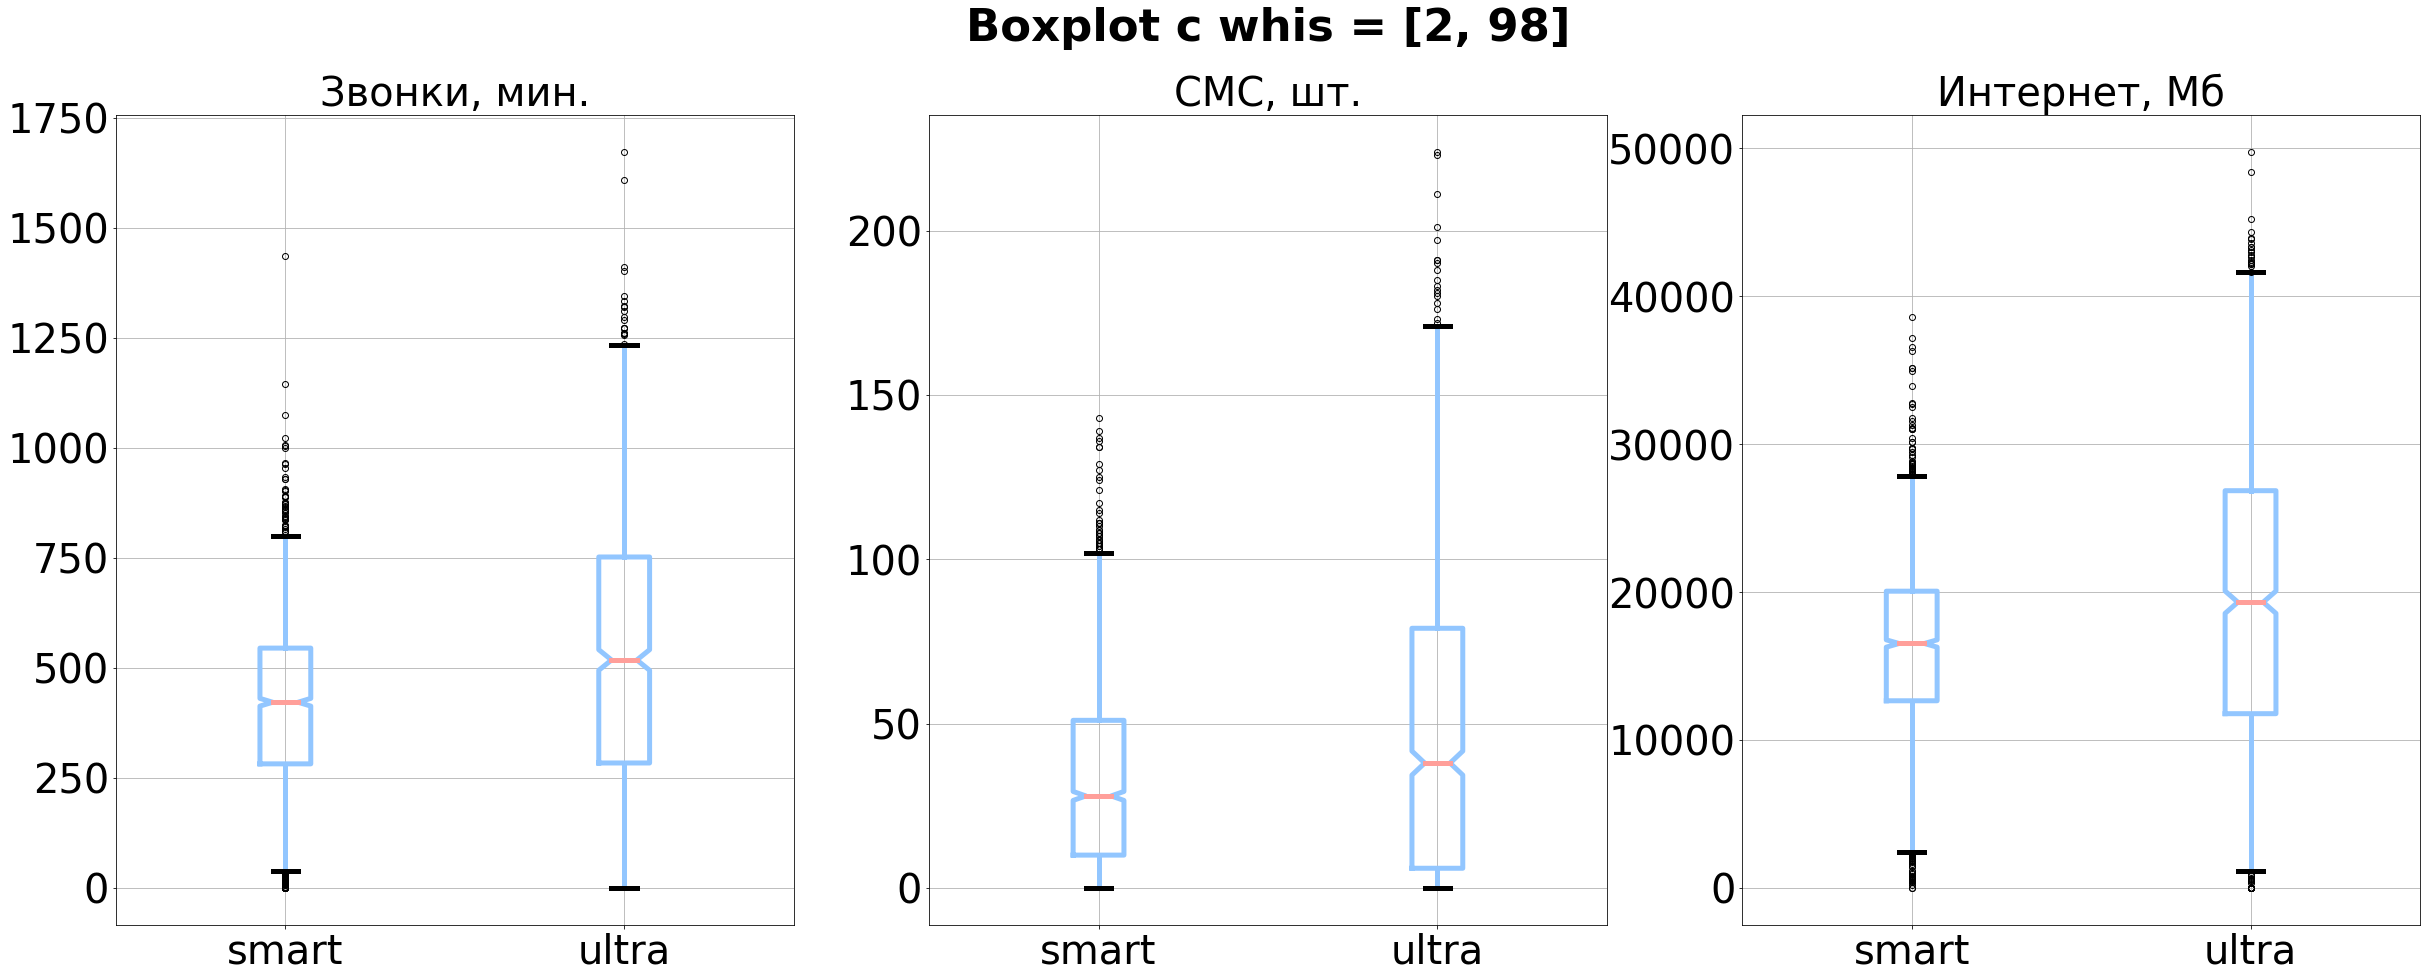

In [77]:
plot_box([2,98])

<a name="3.1.2."></a><br/>
<b>3.1.2. whis = 1,5:</b><br/>
<font size="2">([к содержанию](#0.0))</font>

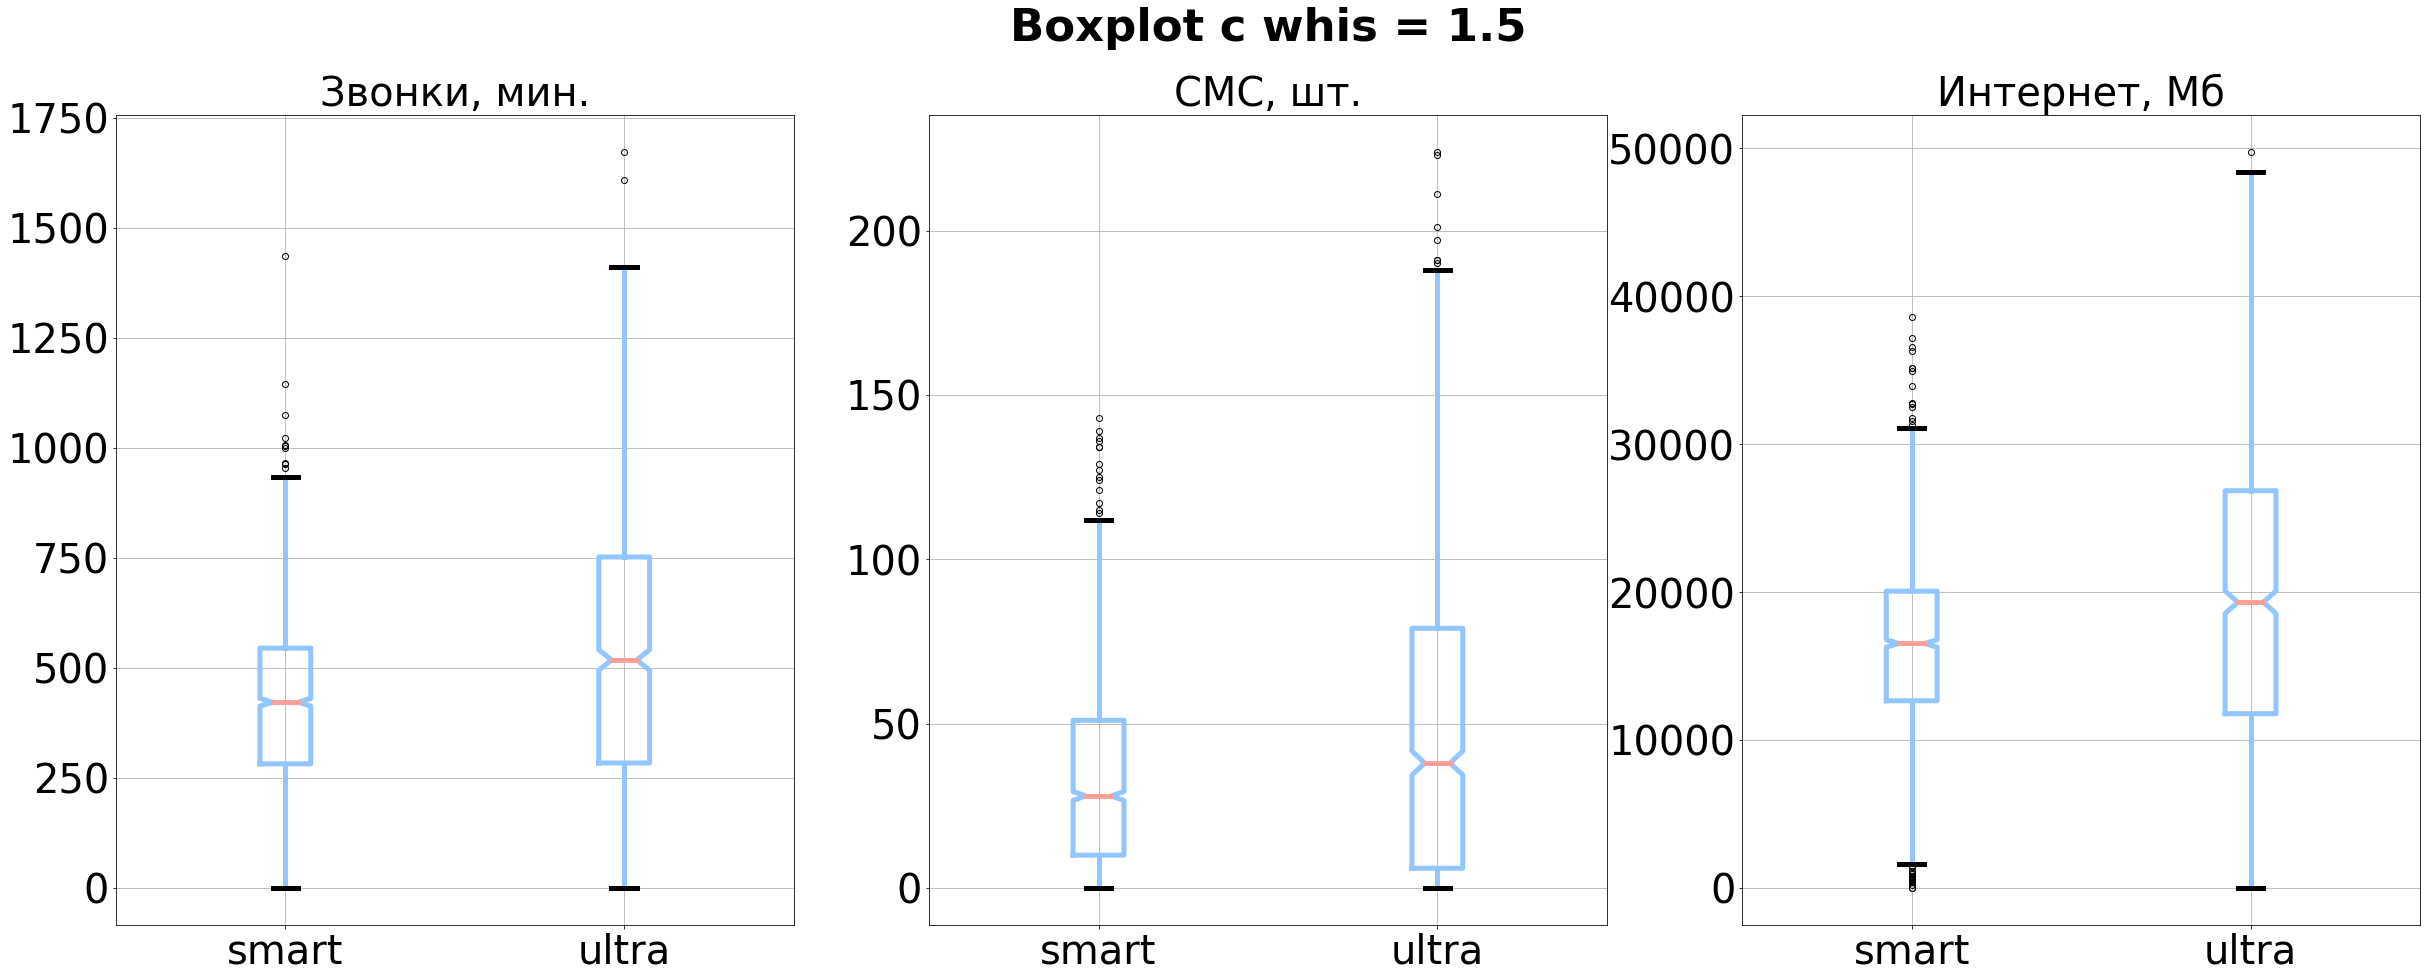

In [78]:
plot_box(1.5)

При параметре whis = 1,5 аномалий отбрасывается меньше, другими словами, мы бережней фильтруем данные, чем при [2,98].<br/>
В связи с этим, определим интервалы данных по <b>boxplot</b>'ам с whis = 1,5.

<a name="3.1.3."></a><br/>
<b>3.1.3. Определение интервалов данных для последующей их фильтрации:</b><br/>
<font size="2">([к содержанию](#0.0))</font>

Для этого напишем функцию, которая рассчитает нам эти интервалы:

In [79]:
def get_intervals(column, data_filter):
    
    if data_filter == 'Тариф':
        format_name = column
        data1, data2 = 'smart', 'ultra'
        format_end1 = 'тарифа "Смарт"'
        format_end2 = 'тарифа "Ультра"'
    elif data_filter == 'is_Moscow':
        format_name = 'is_Moscow'
        data1, data2 = 0, 1
        format_end1 = 'для регионов'
        format_end2 = 'для Москвы'
    
    q1_1 = df_event_numbers[df_event_numbers[data_filter] == data1][column].quantile(0.25)
    q3_1 = df_event_numbers[df_event_numbers[data_filter] == data1][column].quantile(0.75)
    diff_1 = q3_1 - q1_1
    
    if data_filter == 'is_Moscow':
        left_int_1 = np.where( (q1_1 - 1.5 * diff_1) > 550, q1_1 - 1.5 * diff_1, 550)
    else:
        left_int_1 = np.where( (q1_1 - 1.5 * diff_1) > 0, q1_1 - 1.5 * diff_1, 0)
    
    right_int_1 = np.where( (q3_1 + 1.5 * diff_1) > 0, q3_1 + 1.5 * diff_1, 0)
    
    q1_2 = df_event_numbers[df_event_numbers[data_filter] == data2][column].quantile(0.25)
    q3_2 = df_event_numbers[df_event_numbers[data_filter] == data2][column].quantile(0.75)
    diff_2 = q3_2 - q1_2
    
    if data_filter == 'is_Moscow':
        left_int_2 = np.where( (q1_2 - 1.5 * diff_2) > 550, q1_2 - 1.5 * diff_2, 550)
    else:
        left_int_2 = np.where( (q1_2 - 1.5 * diff_2) > 0, q1_2 - 1.5 * diff_2, 0)
        
    right_int_2 = np.where( (q3_2 + 1.5 * diff_2) > 0, q3_2 + 1.5 * diff_2, 0)
    
    print('Границы интервала для столбца "{}" {}: {} - {}'.format(column, format_end1, left_int_1, right_int_1))
    print('Границы интервала для столбца "{}" {}: {} - {}'.format(column, format_end2, left_int_2, right_int_2))
    
    return (left_int_1, right_int_1), (left_int_2, right_int_2)

Найдем границы интервала по длительности звонков:

In [80]:
calls_int_smart, calls_int_ultra = get_intervals('Звонки, мин.', 'Тариф')

Границы интервала для столбца "Звонки, мин." тарифа "Смарт": 0.0 - 939.5
Границы интервала для столбца "Звонки, мин." тарифа "Ультра": 0.0 - 1454.0


Найдем границы интервала по количеству отправленных СМС:

In [81]:
sms_int_smart, sms_int_ultra = get_intervals('СМС, шт.', 'Тариф')

Границы интервала для столбца "СМС, шт." тарифа "Смарт": 0.0 - 112.5
Границы интервала для столбца "СМС, шт." тарифа "Ультра": 0.0 - 188.5


Найдем границы интервала по количеству использованного трафика:

In [82]:
internet_int_smart, internet_int_ultra = get_intervals('Интернет, Мб', 'Тариф')

Границы интервала для столбца "Интернет, Мб" тарифа "Смарт": 1543.0 - 31183.0
Границы интервала для столбца "Интернет, Мб" тарифа "Ультра": 0.0 - 49480.0


<a name="3.2."></a><br/>
<b>3.2.</b> Построим <b>гистограммы</b> по тарифам по длительности звонков, по количеству отправленных смс, по количеству потраченного интернет-трафика. Помимо этого, выведем на расчетные данные по среднему, дисперсии и стандартному отклонению:<br/>
<font size="2">([к содержанию](#0.0))</font>

Напишем для этого функцию:

In [83]:
def plot_hist_comparison(data):
    
    ax = plt.gca()
    func_dict = {'Звонки': 'Звонки, мин.', 'СМС': 'СМС, шт.', 'Интернет': 'Интернет, Мб'}
    xlims = [(calls_int_smart[0], calls_int_smart[1]), (calls_int_ultra[0], calls_int_ultra[1]),
             (sms_int_smart[0], sms_int_smart[1]), (sms_int_ultra[0], sms_int_ultra[1]),
             (internet_int_smart[0], internet_int_smart[1]), (internet_int_ultra[0], internet_int_ultra[1])]
    
    filt_column = func_dict[data]

    # оформление в зависимости от рассматриваемых данных
    if data == 'Звонки':
        title = 'Гистограмма длительности звонков, мин.'
        xlim1 = xlims[0]
        xlim2 = xlims[1]
        text_x = (58, 8)
        text_y = 118
        count_text_x = 1150
        count_text_y = 75
        alpha = 0.8
        # annot_xy = (990, 60)
        # annot_xytext = (970, 70)
    elif data == 'СМС':
        title = 'Гистограмма количества отправленных СМС, шт.'
        xlim1 = xlims[2]
        xlim2 = xlims[3]
        text_x = (5.5, 1)
        text_y = 200
        count_text_x = 148
        count_text_y = 230
        alpha = 1
        # annot_xy = (133, 220)
        # annot_xytext = (130, 260)
    else:
        title = 'Гистограмма количества использованного интернет-трафика, Мб'
        xlim1 = xlims[4]
        xlim2 = xlims[5]
        text_x = (3300, 200)
        text_y = 130
        count_text_x = 38000
        count_text_y = 82
        alpha = 0.8
        # annot_xy = (31100, 73)
        # annot_xytext = (30400, 86)
    
    # получаем отфильтрованные от выбросов датафреймы
    filtered_smart_data = df_event_numbers[(df_event_numbers['Тариф'] == 'smart') &
                                           (df_event_numbers[filt_column] >= xlim1[0]) &
                                           (df_event_numbers[filt_column] <= xlim1[1])][filt_column]
    filtered_ultra_data = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra') &
                                           (df_event_numbers[filt_column] >= xlim2[0]) &
                                           (df_event_numbers[filt_column] <= xlim2[1])][filt_column]
    # рисуем
    filtered_smart_data.plot(kind='hist', bins=40, figsize=(12,6), ec='black', ax=ax, color='#92c6ff', 
                             title=title, xlim=xlim1)
    filtered_ultra_data.plot(kind='hist', bins=70, figsize=(12,6), ec='black', ax=ax, color='#97F0AA', 
                             title=title, xlim=xlim2, alpha=alpha)
    
    # расчетные данные
    mean_smart = filtered_smart_data.mean()
    mean_ultra = filtered_ultra_data.mean()
    dispersion_smart = filtered_smart_data.var()
    dispersion_ultra = filtered_ultra_data.var()
    std_smart = filtered_smart_data.std()
    std_ultra = filtered_ultra_data.std()
    
    if data == 'СМС':
        smart_data = 'Среднее - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_smart, dispersion_smart, std_smart)
        ultra_data = 'Среднее - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_ultra, dispersion_ultra, std_ultra)
    else:
        smart_data = 'Среднее - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(mean_smart, dispersion_smart, std_smart)
        ultra_data = 'Среднее - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(mean_ultra, dispersion_ultra, std_ultra)
    
    legend_second = plt.legend([smart_data, ultra_data], prop={'size':10.5}, 
                                framealpha=0, bbox_to_anchor=(1.0,0.32), loc=4)
    
    
    plt.gca().add_artist(legend_second)
    
    # рисуем медианы
    plt.axvline(x=filtered_smart_data.median(),linewidth=3, color='#16B4DC', linestyle='--')
    ax.text(filtered_smart_data.median()-text_x[0], text_y, '{0:.0f}'.format(filtered_smart_data.median()), 
            fontweight='bold', fontsize='large')
    plt.axvline(x=filtered_ultra_data.median(),linewidth=3, color='#35B815', linestyle='--')
    ax.text(filtered_ultra_data.median()+text_x[1], text_y, '{0:.0f}'.format(filtered_ultra_data.median()), 
            fontweight='bold', fontsize='large')
    
    plt.legend(['Медиана Смарт', 'Медиана Ультра', 'Смарт', 'Ультра'], prop={'size':12})
    ax.text(count_text_x, count_text_y, 'Расчетные данные', fontweight='bold', fontsize='large')
    
    # ax.annotate('Расчетные данные', xy=annot_xy, xytext=annot_xytext, arrowprops=dict(facecolor='black', shrink=0.05),
                # horizontalalignment='right', verticalalignment='top')

<a name="3.2.1."></a><br/>
<b>3.2.1. Гистограмма длительности звонков:</b><br/>
<font size="2">([к содержанию](#0.0))</font>

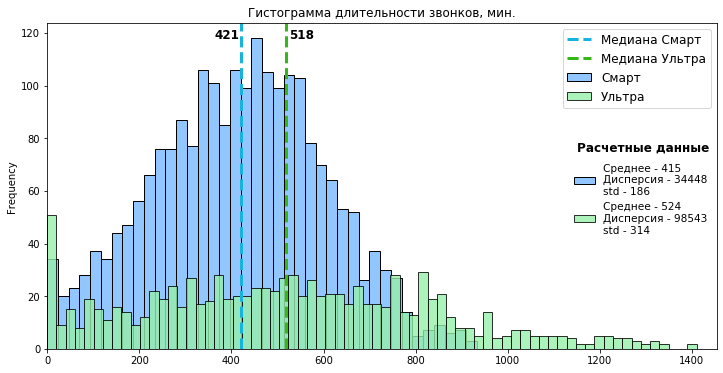

In [84]:
plot_hist_comparison('Звонки')

В основном, на тарифе <font color=#0F74F1><b>Смарт</b></font> люди разговаривают в месяц в течение 250-550 минут. Причем медиана равна 421 минуте, когда лимит общения по тарифу за абонентскую плату - 500 минут, т.е. пользователи регулярно выбирают почти полный лимит голосовой связи.<br/>
С тарифом <font color=#20B605><b>Ультра</b></font> немного иная ситуация - большая часть пользователей вообще не разговаривает голосом. Из тех, кто разговаривает, в среднем наговаривают 518 минут.<br/>
По итогу, медиана тарифа <font color=#20B605><b>Ультра</b></font> больше, чем медиана <font color=#0F74F1><b>Смарт</b></font>.

<a name="3.2.2."></a><br/>
<b>3.2.2. Гистограмма количества отправленных СМС:</b><br/>
<font size="2">([к содержанию](#0.0))</font>

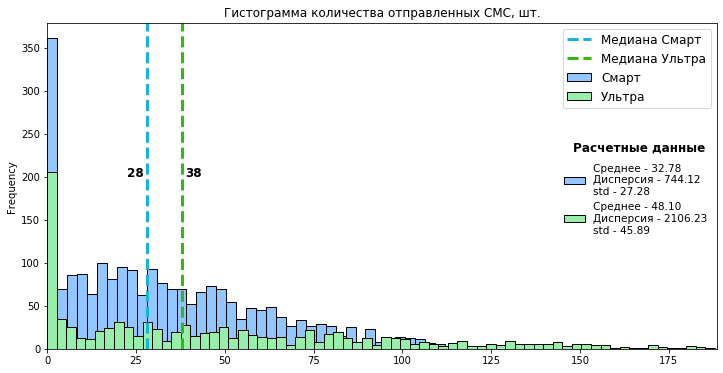

In [85]:
plot_hist_comparison('СМС')

По обоим тарифам ситуация схожая - большая часть пользователей не отправляет СМС сообщения.</br>
Однако, из тех, кто отправляет, большую активность проявляют пользователи тарифа <font color=#0F74F1><b>Смарт</b></font> - в среднем они отправляют до 30 СМС в месяц. Пользователи тарифа <font color=#0F74F1><b>Смарт</b></font> отправляют до 50 СМС.

<a name="3.2.3."></a><br/>
<b>3.2.3. Гистограмма использованного интернет-трафику:</b><br/>
<font size="2">([к содержанию](#0.0))</font>

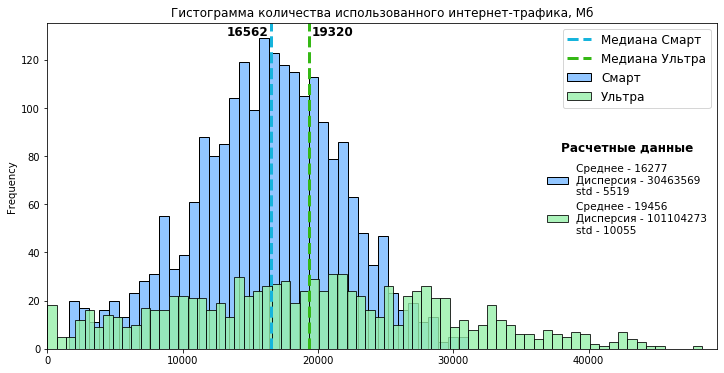

In [86]:
plot_hist_comparison('Интернет')

Клиенты с тарифом <font color=#0F74F1><b>Смарт</b></font> в среднем в месяц используют от 14 до 20 Гб трафика. Причем медиана равна 16,5 Гб, что "вылезает" за пределы, установленные абонентской платой - в 15 Гб. Фактически, клиенты тарифа <font color=#0F74F1><b>Смарт</b></font> регулярно заказывают доп. пакеты с интернетом, когда основной пакет заканчивается.<br/>
Клиенты с тарифом <font color=#20B605><b>Ультра</b></font> активней пользуются интернетом - медиана равна 19 Гб, но учитывая лимит в 30 Гб, у них есть ещё большой запас по количеству оставшегося для использования трафика.

<font color='blue'> Исследовательский анализ выполнен правильно. </font>

<hr style="border: 1px solid #000;"> 

<a name="4."></a>
## Шаг 4. Проверка гипотез
<font size="2">([к содержанию](#0.0))</font>

<a name="4.1."></a><br/>
<font size="4.1."><b>4.1. Первая гипотеза о равенстве средних двух генеральных совокупностей:</b><br/></font>
<b>средняя выручка пользователей тарифов <font color=#20B605><b>Ультра</b></font> и <font color=#0F74F1><b>Смарт</b></font> различается.<b>

<b>H0 (нулевая гипотеза)</b> - предположение о том, что между данными у нас нет связи. В данном случае, что средняя выручка пользователей тарифа <font color=#0F74F1><b>Смарт</b></font> <b>не отличается</b> от средней выручки пользователей тарифа <font color=#20B605><b>Ультра</b></font>.<br/>
<b>H1 (альтернативная гипотеза)</b> - средняя выручка пользователей тарифа <font color=#0F74F1><b>Смарт</b></font> <b>отличается</b> от средней выручки пользователей тарифа <font color=#20B605><b>Ультра</b></font>.<br/>

<a name="4.1.1."></a><br/>
<b>4.1.1. Формирование выборок без аномалий:</b><br/>
<font size="2">([к содержанию](#0.0))</font>

Посмотрим на выбросы:

Text(0.5, 0.93, 'Boxplot по выручке с whis = 1,5')

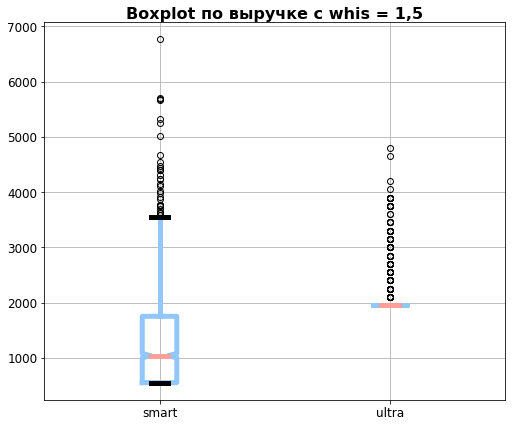

In [87]:
ax = df_event_numbers.boxplot(column='Сумма за месяц, руб.', by='Тариф', fontsize=12,
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, figsize=(8,7))
ax.set_title('')
ax.title.set_size(40)
ax.set_xlabel('')
plt.suptitle('Boxplot по выручке с whis = 1,5', y=0.93, fontsize=16, fontweight='bold')

Посчитаем границы интервалов:

In [88]:
revenue_int_smart, revenue_int_ultra = get_intervals('Сумма за месяц, руб.', 'Тариф')

Границы интервала для столбца "Сумма за месяц, руб." тарифа "Смарт": 0.0 - 3550.0
Границы интервала для столбца "Сумма за месяц, руб." тарифа "Ультра": 1950.0 - 1950.0


Выберем нужные нам данные - среднюю месячную выручку по тарифам <font color=#0F74F1><b>Смарт</b></font> и "Ультра":

In [89]:
smart_mean_revenue = df_event_numbers[(df_event_numbers['Тариф'] == 'smart') &
                                      (df_event_numbers['Сумма за месяц, руб.'] >= revenue_int_smart[0]) &
                                      (df_event_numbers['Сумма за месяц, руб.'] <= revenue_int_smart[1])]['Сумма за месяц, руб.']

ultra_mean_revenue = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra') &
                                      (df_event_numbers['Сумма за месяц, руб.'] >= revenue_int_ultra[0]) &
                                      (df_event_numbers['Сумма за месяц, руб.'] <= revenue_int_ultra[1])]['Сумма за месяц, руб.']

<a name="4.1.2."></a><br/>
<b>4.1.2. Расчет p-value:</b><br/>
<font size="2">([к содержанию](#0.0))</font><br/><br/>
Т.к. выборки у нас независимые, воспользуемся функцией <b>ttest_ind</b> из модуля <b>scipy.stats</b>:

In [90]:
from scipy.stats import ttest_ind

In [91]:
stat, p = ttest_ind(smart_mean_revenue, ultra_mean_revenue)
print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = -27.932596508963062
p-value = 4.6244593529e-153

Пороговое значение alpha = 0.05


<a name="4.1.3."></a><br/>
<b>4.1.3. Итог.</b><br/>
<font size="2">([к содержанию](#0.0))</font><br/><br/>Нулевую гипотезу отвергаем. <br/>Верно утверждение, что <b>средняя выручка пользователей тарифов <font color=#0F74F1><b>Смарт</b></font> и <font color=#20B605><b>Ультра</b></font> различается.</b><br/>
Посмотрим, в чью пользу:

In [92]:
print('Средняя выручка по пользователям тарифа "Смарт" - {:.2f}'.format(smart_mean_revenue.mean()))
print('Средняя выручка по пользователям тарифа "Ультра" - {}'.format(ultra_mean_revenue.mean()))

Средняя выручка по пользователям тарифа "Смарт" - 1249.74
Средняя выручка по пользователям тарифа "Ультра" - 1950.0


Ожидаемо, что пользователи тарифа <b>"Ультра" в среднем приносят больше денег</b>, т.к. их абонентская плата в 3,5 раза выше, чем абонентская плата пользующихся тарифом <font color=#0F74F1><b>Смарт</b></font> (1950р. против 550р.). Клиенты с тарифом <font color=#0F74F1><b>Смарт</b></font>, конечно, довольно часто (в 75% случаев) "вылезают" за пределы своего тарифа и заказывают доп. услуги, но всё равно не догоняют по тратам на пользователя клиентов с тарифом <font color=#20B605><b>Ультра</b></font>.


<a name="4.2."></a><br/>
<font size="4.2."><b>4.2. Вторая гипотеза о равенстве средних двух генеральных совокупностей:</b><br/></font>
<b>средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.</b><br/>
<font size="2">([к содержанию](#0.0))</font>

<a name="4.2.1."></a><br/>
<b>4.2.1. Формирование выборок без аномалий:</b><br/>
Выберем нужные нам данные - среднюю месячную выручку по Москве и по остальным регионам:

Проставим признак по каждой строке - Москва или регион:

In [93]:
df_event_numbers['is_Moscow'] = np.where(df_event_numbers['Город'] == 'Москва', 1, 0)

In [94]:
df_event_numbers.head()

,User_id,Время года,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,Широта,Долгота,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб.","Сумма за месяц, руб.",Не хватило тарифного плана,is_Moscow
0,1000,весна,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,45.03547,38.975313,1950,0.0,0,0.0,0,1950,0,0
1,1000,зима,12,38.0,333.0,70.0,9827.0,ultra,Краснодар,45.03547,38.975313,1950,0.0,0,0.0,0,1950,0,0
2,1000,лето,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,45.03547,38.975313,1950,0.0,0,0.0,0,1950,0,0
3,1000,лето,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,45.03547,38.975313,1950,0.0,0,0.0,0,1950,0,0
4,1000,лето,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,45.03547,38.975313,1950,0.0,0,0.0,0,1950,0,0


Построим <b>boxplot</b>'ы для вычисления выбросов:

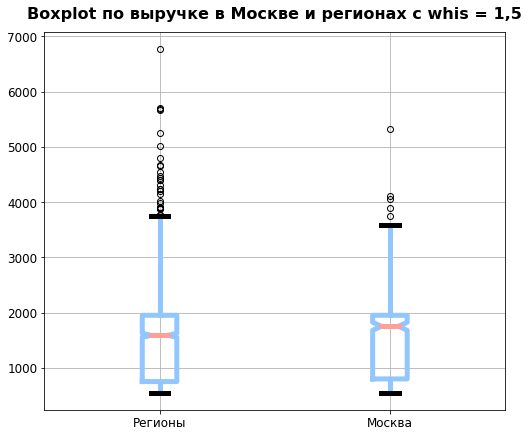

In [95]:
ax = df_event_numbers.boxplot(column='Сумма за месяц, руб.', by='is_Moscow', fontsize=12,
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, figsize=(8,7))



labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Регионы'
labels[1] = 'Москва'

ax.set_xticklabels(labels)

plt.suptitle('Boxplot по выручке в Москве и регионах с whis = 1,5', y=0.95, fontsize=16, fontweight='bold')

ax.set_xlabel('')
ax.set_title('')
ax.title.set_size(40)

Рассчитаем границы интервалов:

In [96]:
revenue_int_smart, revenue_int_ultra = get_intervals('Сумма за месяц, руб.', 'is_Moscow')

Границы интервала для столбца "Сумма за месяц, руб." для регионов: 550.0 - 3750.0
Границы интервала для столбца "Сумма за месяц, руб." для Москвы: 550.0 - 3678.0


Выберем нужные данные - выручку по Москве и по регионам - и произведем расчеты.

In [97]:
moscow_revenue = df_event_numbers[(df_event_numbers['Город'] == 'Москва') &
                                  (df_event_numbers['Сумма за месяц, руб.'] >= revenue_int_smart[0]) &
                                  (df_event_numbers['Сумма за месяц, руб.'] <= revenue_int_smart[1])]['Сумма за месяц, руб.']

regions_revenue = df_event_numbers[(df_event_numbers['Город'] != 'Москва') &
                                  (df_event_numbers['Сумма за месяц, руб.'] >= revenue_int_ultra[0]) &
                                  (df_event_numbers['Сумма за месяц, руб.'] <= revenue_int_ultra[1])]['Сумма за месяц, руб.']

<a name="4.2.2."></a><br/>
<b>4.2.2. Расчет p-value:</b><br/>
<font size="2">([к содержанию](#0.0))</font><br/><br/>
Т.к. выборки у нас независимые, воспользуемся функцией <b>ttest_ind</b> из модуля <b>scipy.stats</b>.

In [98]:
stat, p = ttest_ind(moscow_revenue, regions_revenue)
print('t = {}\np-value = {:.2}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 1.49291699198228
p-value = 0.14

Пороговое значение alpha = 0.05


<a name="4.2.3."></a><br/>
<b>4.2.3. Итог.</b><br/>
<font size="2">([к содержанию](#0.0))</font><br/><br/>Нулевую гипотезу отвергнуть не получается. <br/>Таким образом, верно утверждение, что <b>средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.</b><br/><br/>
Ради интереса посмотрим на выручку по Москве и по регионам:

In [99]:
print('Средняя выручка по пользователю в месяц в Москве: {:.2f}'.format(moscow_revenue.mean()))
print('Средняя выручка по пользователю в месяц в регионах: {:.2f}'.format(regions_revenue.mean()))

Средняя выручка по пользователю в месяц в Москве: 1532.38
Средняя выручка по пользователю в месяц в регионах: 1483.28


В Москве в среднем платят на 50р. больше, чем в регионах. И правда, было бы странно, если бы эта разница оказалась статистически значимой.

<font color='blue'> Гипотезы сформулированы и проверены верно. </font>

<hr style="border: 1px solid #000;"> 

<a name="5."></a>
## Шаг 5. Общий вывод
<font size="2">([к содержанию](#0.0))</font>

<a name="5.1."></a><br/>
<b>5.1. Cоберем общие данные по тарифам по части использования включенных в абонентскую плату лимитов и по части дозаказываемых (пакетов) услуг:</b>

In [100]:
smart_mean_internet = (df_event_numbers[(df_event_numbers['Тариф'] == 'smart')]['Интернет, Мб']/(1024 * 15)).mean()
print('Средний процент использования пакета интернет-трафика по тарифу "Смарт" - {:.2%} = {:,.0f} Гб'.
      format(smart_mean_internet, smart_mean_internet * 1024 * 15))
smart_mean_calls = (df_event_numbers[(df_event_numbers['Тариф'] == 'smart')]['Звонки, мин.']/(500)).mean()
print('Средний процент использования пакета минут по тарифу "Смарт" - {:.2%} = {:.2f} мин'.
      format(smart_mean_calls, smart_mean_calls * 500))
smart_mean_sms = (df_event_numbers[(df_event_numbers['Тариф'] == 'smart')]['СМС, шт.']/(50)).mean()
print('Средний процент использования пакета СМС по тарифу "Смарт" - {:.2%} = {:.0f} шт.'.
      format(smart_mean_sms, smart_mean_sms * 50))
print('---------------------------------------------------------------------------------')
ultra_mean_internet = (df_event_numbers[(df_event_numbers['Тариф'] == 'ultra')]['Интернет, Мб']/(1024 * 30)).mean()
print('Средний процент использования пакета интернет-трафика по тарифу "Ультра" - {:.2%} = {:,.0f} Гб'.
      format(ultra_mean_internet, ultra_mean_internet * 1024 * 30))
ultra_mean_calls = (df_event_numbers[(df_event_numbers['Тариф'] == 'ultra')]['Звонки, мин.']/(3000)).mean()
print('Средний процент использования пакета минут по тарифу "Ультра" - {:.2%} = {:.2f} мин'.
      format(ultra_mean_calls, ultra_mean_calls * 3000))
ultra_mean_sms = (df_event_numbers[(df_event_numbers['Тариф'] == 'ultra')]['СМС, шт.']/(1000)).mean()
print('Средний процент использования пакета СМС по тарифу "Ультра" - {:.2%} = {:.0f} шт.'.
      format(ultra_mean_sms, ultra_mean_sms * 1000))

Средний процент использования пакета интернет-трафика по тарифу "Смарт" - 105.66% = 16,229 Гб
Средний процент использования пакета минут по тарифу "Смарт" - 83.59% = 417.93 мин
Средний процент использования пакета СМС по тарифу "Смарт" - 66.77% = 33 шт.
---------------------------------------------------------------------------------
Средний процент использования пакета интернет-трафика по тарифу "Ультра" - 63.43% = 19,487 Гб
Средний процент использования пакета минут по тарифу "Ультра" - 17.55% = 526.62 мин
Средний процент использования пакета СМС по тарифу "Ультра" - 4.94% = 49 шт.


<br/>
<html>
<body>
<table border="1" cellspacing="0" cellpadding="0">
<tr>
<td> &nbsp; </td>
<td colspan=3 style="text-align:center;"><b>Средний % использования пакета интернет</b></td>
<td colspan=3 style="text-align:center;"><b>Средний % использования пакета минут</b></td>
<td colspan=3 style="text-align:center;"><b>Средний % использования пакета СМС</b></td>  
</tr>
<tr>
<td style="background-color:#92c6ff; font-size: 12px;"> <b>Тариф "Смарт" </b></td>
<td> Лимит по тарифу - 15 Гб </td>
<td style="color:#F1160F; font-size: 15px;" ><b>105,7 % </b></td>
<td style="color:#F1160F; font-size: 15px;" ><b>16,3 Гб</b></td>
<td> Лимит по тарифу - 500 мин </td>
<td style="color:#ff5050; font-size: 15px;" ><b>83,6 % </b></td>
<td style="color:#ff5050; font-size: 15px;" ><b>418 мин</b></td>
<td> Лимит по тарифу - 50 шт. </td>
<td>66,8 %</td>
<td>33 шт.</td>
<td> &nbsp; </td>
</tr>
<tr>
<td style="background-color:#97F0AA; font-size: 12px;"> <b>Тариф "Ультра"</b></td>
<td> Лимит по тарифу - 30 Гб </td>
<td>63,4 %</td>
<td>19,5 Гб</td>
<td> Лимит по тарифу - 3000 мин </td>
<td style="color:#3F8DEE; font-size: 15px;" ><b>17,6 %</b></td>
<td style="color:#3F8DEE; font-size: 15px;" ><b>526 мин</b></td>
<td> Лимит по тарифу - 1000 шт. </td>
<td style="color:#0F74F1; font-size: 15px;" ><b>4,9 %</b></td>
<td style="color:#0F74F1; font-size: 15px;" ><b>49 шт.</b></td>
</tr>
</table>
</body>
</html>

Красным (с оттенками) отмечены критичные или почти критичные позиции - где лимитов пользователям недостаточно, синим (с оттенками) - где лимиты используются менее чем на 20% (5%).

<a name="5.2."></a><br/>
<b>5.2. Информация по самим переплатам:</b><br/>
<font size="2">([к содержанию](#0.0))</font>

In [101]:
smart_over_mean_internet = df_event_numbers[(df_event_numbers['Тариф'] == 'smart')]['Мб сверх'].mean()
smart_over_mean_internet_rub = np.round(smart_over_mean_internet, -3)/1000 * 200
print('Среднее превышение пакета интернет по тарифу "Смарт" - {:.0f} Мб на сумму - {:.0f} руб.'.
      format(smart_over_mean_internet, smart_over_mean_internet_rub))

smart_over_mean_calls = np.ceil(df_event_numbers[(df_event_numbers['Тариф'] == 'smart')]['Минуты сверх'].mean())
smart_over_mean_calls_rub = smart_over_mean_calls * 3
print('Среднее превышение пакета минут по тарифу "Смарт" - {:.0f} мин на сумму - {:.0f} руб.'.
      format(smart_over_mean_calls, smart_over_mean_calls_rub))

smart_over_mean_sms = np.ceil(df_event_numbers[(df_event_numbers['Тариф'] == 'smart')]['СМС сверх'].mean())
smart_over_mean_sms_rub = smart_over_mean_sms * 3
print('Среднее превышение пакета СМС по тарифу "Смарт" - {:.0f} шт. на сумму - {:.0f} руб.'.
      format(smart_over_mean_sms, smart_over_mean_sms_rub))

print('----------------------------------------------------------------')

ultra_over_mean_internet = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra')]['Мб сверх'].mean()
ultra_over_mean_internet_rub = np.round(ultra_over_mean_internet, -3)/1000 * 150
print('Среднее превышение пакета интернет по тарифу "Ультра" - {:.0f} Мб на сумму - {:.0f} руб.'.
      format(ultra_over_mean_internet, ultra_over_mean_internet_rub))

ultra_over_mean_calls = np.ceil(df_event_numbers[(df_event_numbers['Тариф'] == 'ultra')]['Минуты сверх'].mean())
ultra_over_mean_calls_rub = ultra_over_mean_calls * 3
print('Среднее превышение пакета минут по тарифу "Ультра" - {:.0f} мин на сумму - {:.0f} руб.'.
      format(ultra_over_mean_calls, ultra_over_mean_calls_rub))

ultra_over_mean_sms = np.ceil(df_event_numbers[(df_event_numbers['Тариф'] == 'ultra')]['СМС сверх'].mean())
ultra_over_mean_sms_rub = ultra_over_mean_sms * 3
print('Среднее превышение пакета СМС по тарифу "Ультра" - {:.0f} шт. на сумму - {:.0f} руб.'.
      format(ultra_over_mean_sms, ultra_over_mean_sms_rub))

Среднее превышение пакета интернет по тарифу "Смарт" - 2771 Мб на сумму - 600 руб.
Среднее превышение пакета минут по тарифу "Смарт" - 42 мин на сумму - 126 руб.
Среднее превышение пакета СМС по тарифу "Смарт" - 6 шт. на сумму - 18 руб.
----------------------------------------------------------------
Среднее превышение пакета интернет по тарифу "Ультра" - 755 Мб на сумму - 150 руб.
Среднее превышение пакета минут по тарифу "Ультра" - 0 мин на сумму - 0 руб.
Среднее превышение пакета СМС по тарифу "Ультра" - 0 шт. на сумму - 0 руб.


<br/>
<html>
<body>
<table border="1">
<tr>
<td> &nbsp; </td>
<td colspan=2 style="text-align:center;"><strong style="font-size:11px;"><b>Среднее превышение пакета интернет и переплата</b></strong></td>
<td colspan=2 style="text-align:center;"><strong style="font-size:11px;"><b>Среднее превышение пакета минут и переплата</b></strong></td>
<td colspan=2 style="text-align:center;"><strong style="font-size:11px;"><b>Среднее превышение пакета минут пакета СМС и переплата</b></strong></td>  
</tr>
<tr>
<td style="background-color:#92c6ff; font-size: 12px;"> <b>Тариф "Смарт" </b></td>
<td>2771 Мб</td>
<td>600 руб.</td>
<td>42 мин</td>
<td>126 руб.</td>
<td>6 шт.</td>
<td>18 руб.</td>
</tr>
<tr>
<td style="background-color:#97F0AA; font-size: 11px;"> <b>Тариф "Ультра"</b></td>
<td>755 Мб</td>
<td>150 руб.</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
</table>
</body>
</html>

И ещё раз выведем информацию по выручке:

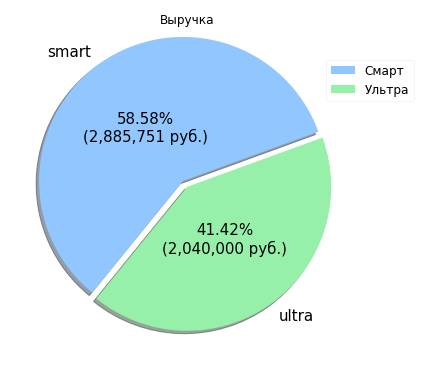

In [102]:
all_revenue = df_event_numbers['Сумма за месяц, руб.'].sum()


def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df_event_numbers.groupby('Тариф')['Сумма за месяц, руб.'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Выручка', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')
    
ax.title.set_size(40)
plt.tight_layout(pad=0)

<a name="5.3."></a><br/>
<font size="3.5"><b>Вывод:</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

Тариф <font color=#0F74F1><b>Смарт</b></font> приносит около 60% всей выручки, но при этом на него приходится 2200 пользователей. Тариф <font color=#20B605><b>Ультра</b></font> дает остальные 40%, но эту выручку генерируют всего 1000 пользователей.<br/>
Среднему пользователю тарифа <font color=#0F74F1><b>Смарт</b></font> не хватает 2 Гб интернета к заложенными в абонентскую плату 15 Гб и ему приходится дозаказывать эти 2 Гб и доплачивать за них 400 рублей.<br/>
Если рассматривать только тех пользователей <font color=#0F74F1><b>Смарт</b></font>, кто вылезает за лимиты по интернет-трафику, то средний размер доп. заказа интернет-трафика равен 3 Гб, за которые они платят 600 рублей.<br/><br/>
Таким образом, в тарифной сетке есть дешевый тариф <font color=#0F74F1><b>Смарт</b></font> за 550 рублей, где пользователю не хватает интернета и количество использованных минут разговора на грани лимита (418 мин из 500), и есть тариф <font color=#20B605><b>Ультра</b></font>, стоимостью 1950 рублей, которым пользуется уже другой класс граждан, где лимитов по всем типам связи предостаточно (иногда дозаказывают в среднем 1 Гб интернета).<br/>
<br/><br/>
Итог таков, что <b>"Мегалайну"</b> надо подумать и выработать промежуточное решение, которое позволяло бы клиенту более комфортно, без доп. заказов, пользоваться услугами связи (особенно мобильным интернетом), при этом по цене являлось бы промежуточным вариантом между текущими <font color=#0F74F1><b>Смарт</b></font> и <font color=#20B605><b>Ультра</b></font>. Учитывая то, что средний пользователь тарифа <font color=#0F74F1><b>Смарт</b></font> дозаказывает 2 Гб на 400 рублей, т.е. платит в итоге 550 + 400 = 950 рублей за месяц, это значит, что эти деньги клиент готов тратить в месяц в качестве абонентской платы. Например, можно рассмотреть вариант создания тарифа, в дополнение к текущим, под названием "<font color=#0F74F1><b>См</b><font color=#20B605><b>арт</b></font></font>-<font color=#20B605><b>Уль</b></font><font color=#0F74F1><b>тра</b></font>", который был бы создан на основе тарифа <font color=#0F74F1><b>Смарт</b></font>, но с пакетом интернет-трафика в 20 Гб и стоимостью 950 рублей. Для большего привлечения внимания к тарифу можно расширить пакет минут и пакет СМС с 500-50 до 750 и 100 соответственно. Компания в плане выручки не потеряет, т.к. средний пользователь не дозаказывает эти услуги, но при этом заставит выглядеть предложение выгодней.

<font color='blue'> Отличный проект. Молодец. Удачи в сборном проекте. </font>